# Fase 1: Setup Ambiente
Configurazione iniziale specifica per il repository fornito:
1.  Clonazione da `github.com/nikcian/Visual-Place-Recognition-Project`.
2.  Setup del branch di lavoro `Marco`.
3.  Localizzazione e pulizia del file `requirements.txt` (situato in `VPR-methods-evaluation`).
4.  Installazione librerie necessarie per Colab.

In [1]:
import os
import shutil
import subprocess
import sys

# 1. Reset Posizione Base
os.chdir("/content")
project_path = "/content/Visual-Place-Recognition-Project"

# 2. Pulizia preventiva
if os.path.exists(project_path):
    print(f"🧹 Pulizia vecchia cartella...")
    shutil.rmtree(project_path)

# 3. Clonazione Repository (Versione Nikcian)
print("📥 Clonazione del repository (Nikcian)...")
subprocess.run(["git", "clone", "https://github.com/nikcian/Visual-Place-Recognition-Project.git"], check=True)

# 4. Gestione Branch 'Marco'
if os.path.exists(project_path):
    os.chdir(project_path)
    print(f"📂 Entrato in: {os.getcwd()}")

    print("🔀 Passaggio al branch 'Marco'...")
    # Tenta checkout remoto, altrimenti crea locale
    res = subprocess.run(["git", "checkout", "Marco"], capture_output=True)
    if res.returncode != 0:
        print("⚠️ Branch remoto non trovato, creo locale da main...")
        subprocess.run(["git", "checkout", "-b", "Marco"])

    # 5. FIX REQUIREMENTS (Percorso Corretto: VPR-methods-evaluation)
    req_path = os.path.join("VPR-methods-evaluation", "requirements.txt")
    new_req_path = os.path.join("VPR-methods-evaluation", "requirements_colab.txt")

    if os.path.exists(req_path):
        print(f"🔧 Trovato {req_path}. Adattamento per Colab...")

        try:
            with open(req_path, "r") as f:
                lines = f.readlines()

            with open(new_req_path, "w") as f:
                for line in lines:
                    # Prende solo il nome del pacchetto
                    pkg = line.split("==")[0].split(">=")[0].strip()

                    # Saltiamo torch/numpy/scipy (già presenti/ottimizzati su Colab)
                    if pkg.lower() in ["torch", "torchvision", "numpy", "matplotlib", "scipy", "pillow"]:
                        continue

                    if pkg:
                        f.write(f"{pkg}\n")

            print("📦 Installazione librerie dal file adattato...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", new_req_path, "--quiet"])

            # Installazioni manuali extra per sicurezza
            print("📦 Installazione Faiss-GPU, Gdown e Loguru...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", "faiss-gpu", "gdown", "loguru", "einops", "--quiet"])

            print("🎉 Setup completato con successo!")

        except Exception as e:
            print(f"❌ Errore durante l'installazione delle librerie: {e}")
    else:
        print(f"❌ Errore Critico: Non trovo il file {req_path}. Controlla la struttura.")

else:
    print(f"❌ Errore: Cartella {project_path} non trovata.")

📥 Clonazione del repository (Nikcian)...
📂 Entrato in: /content/Visual-Place-Recognition-Project
🔀 Passaggio al branch 'Marco'...
🔧 Trovato VPR-methods-evaluation/requirements.txt. Adattamento per Colab...
📦 Installazione librerie dal file adattato...
📦 Installazione Faiss-GPU, Gdown e Loguru...
❌ Errore durante l'installazione delle librerie: Command '['/usr/bin/python3', '-m', 'pip', 'install', 'faiss-gpu', 'gdown', 'loguru', 'einops', '--quiet']' returned non-zero exit status 1.


In [2]:
import subprocess
import sys

print("🔧 Tentativo di riparazione manuale delle librerie...")

def install(package):
    try:
        print(f"📦 Installazione {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--quiet"])
        print(f"✅ {package} installato!")
        return True
    except subprocess.CalledProcessError:
        print(f"⚠️ Errore installando {package}.")
        return False

# 1. Installiamo le librerie accessorie sicure
install("gdown")
install("loguru")
install("einops")

# 2. Gestione Intelligente di FAISS
print("⚙️ Configurazione Faiss...")
# Prima proviamo la versione GPU
if not install("faiss-gpu"):
    print("🔄 Fallback: Provo a installare faiss-cpu...")
    # Se fallisce, proviamo la CPU
    if install("faiss-cpu"):
        print("✅ Faiss-CPU installato con successo (modalità compatibile).")
    else:
        print("❌ Errore critico: Impossibile installare Faiss (né GPU né CPU).")
else:
    print("✅ Faiss-GPU installato correttamente.")

print("\n🎉 Riparazione completata. Ora puoi procedere al download dei dati.")

🔧 Tentativo di riparazione manuale delle librerie...
📦 Installazione gdown...
✅ gdown installato!
📦 Installazione loguru...
✅ loguru installato!
📦 Installazione einops...
✅ einops installato!
⚙️ Configurazione Faiss...
📦 Installazione faiss-gpu...
⚠️ Errore installando faiss-gpu.
🔄 Fallback: Provo a installare faiss-cpu...
📦 Installazione faiss-cpu...
✅ faiss-cpu installato!
✅ Faiss-CPU installato con successo (modalità compatibile).

🎉 Riparazione completata. Ora puoi procedere al download dei dati.


In [ ]:
import os
import gdown
import shutil

if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")

print("📝 Verifica Dataset...")

datasets = {
    #"sf_xs": "https://drive.google.com/file/d/1tQqEyt3go3vMh4fj_LZrRcahoTbzzH-y/view?usp=share_link",
    #"tokyo_xs": "https://drive.google.com/file/d/15QB3VNKj93027UAQWv7pzFQO1JDCdZj2/view?usp=share_link",
    "svox": "https://drive.google.com/file/d/16iuk8voW65GaywNUQlWAbDt6HZzAJ_t9/view?usp=drive_link"
}

os.makedirs("data", exist_ok=True)

for name, url in datasets.items():
    if os.path.exists(f"data/{name}") and len(os.listdir(f"data/{name}")) > 0:
        print(f"✅ {name} già presente.")
        continue

    print(f"⬇️ Scaricando {name}...")
    gdown.download(url, f"data/{name}.zip", quiet=False, fuzzy=True)

    if os.path.exists(f"data/{name}.zip"):
        print(f"📂 Estraendo {name}...")
        shutil.unpack_archive(f"data/{name}.zip", "data")
        os.remove(f"data/{name}.zip")
        print(f"🎉 {name} pronto!")

📝 Verifica Dataset...
⬇️ Scaricando svox...


Downloading...
From (original): https://drive.google.com/uc?id=16iuk8voW65GaywNUQlWAbDt6HZzAJ_t9
From (redirected): https://drive.google.com/uc?id=16iuk8voW65GaywNUQlWAbDt6HZzAJ_t9&confirm=t&uuid=b6271290-a71a-4c8c-a5be-8b01eaa7d574
To: /content/Visual-Place-Recognition-Project/data/svox.zip
100%|██████████| 3.51G/3.51G [01:07<00:00, 51.9MB/s]


📂 Estraendo svox...
🎉 svox pronto!


In [ ]:
import os
import glob

# Percorso generato dal tuo script di estrazione
svox_root = "/content/Visual-Place-Recognition-Project/data/svox/images/train"

print("📊 --- CONTEGGIO QUERIES SVOX ---")

# Conteggio semplice dei file nelle cartelle
n_sun = len(os.listdir(os.path.join(svox_root, "queries_sun")))
n_night = len(os.listdir(os.path.join(svox_root, "queries_night")))
n_gallery = len(os.listdir(os.path.join(svox_root, "gallery")))

print(f"☀️ SUN:   {n_sun}")
print(f"🌑 NIGHT: {n_night}")
print(f"🖼️ DB:    {n_gallery}")

📊 --- CONTEGGIO QUERIES SVOX ---
☀️ SUN:   712
🌑 NIGHT: 702
🖼️ DB:    22232


# 🧪 Esperimento 1: Benchmark CosPlace (L2 Distance)
Esecuzione del modello CosPlace (ResNet18, 512 dim) sui tre dataset di test standard:
1. **SF-XS** (Test)
2. **Tokyo-XS**
3. **SVOX** (Night)
Viene utilizzata la metrica standard (Distanza Euclidea L2).

# ⚙️ Configurazione SVOX
Dallo screenshot abbiamo individuato i percorsi corretti per il test "Night":
* **Database:** `data/svox/images/train/gallery`
* **Queries:** `data/svox/images/train/queries_night`
Questo script salva questi percorsi per l'uso automatico nei benchmark.

In [ ]:
import os

# Definiamo i percorsi basati sulla tua immagine
base_svox = "../data/svox/images/train"
svox_db = os.path.join(base_svox, "gallery")
svox_q = os.path.join(base_svox, "queries_night")

print(f"🔍 Verifica percorsi SVOX Night...")

if os.path.exists(svox_db) and os.path.exists(svox_q):
    print("✅ Percorsi trovati!")
    print(f"   Database: {svox_db}")
    print(f"   Queries:  {svox_q}")

    # Salviamo in un file per gli altri script
    with open("svox_paths.txt", "w") as f:
        f.write(f"{svox_db}\n{svox_q}")
    print("💾 Configurazione salvata.")
else:
    print("❌ Errore: Non trovo le cartelle 'gallery' o 'queries_night' in data/svox/images/train.")
    print("Contenuto di data/svox/images/train:")
    try:
        print(os.listdir(base_svox))
    except:
        print("Cartella non trovata.")

🔍 Verifica percorsi SVOX Night...
❌ Errore: Non trovo le cartelle 'gallery' o 'queries_night' in data/svox/images/train.
Contenuto di data/svox/images/train:
Cartella non trovata.


# 🧪 Benchmark


In [ ]:
import os

# Ci assicuriamo di essere nella cartella corretta
if os.path.exists("/content/Visual-Place-Recognition-Project/VPR-methods-evaluation"):
    os.chdir("/content/Visual-Place-Recognition-Project/VPR-methods-evaluation")

print("🚀 --- AVVIO NETVLAD SU SVOX (RAIN & SNOW) ---")

# Percorsi base
base_svox = "../data/svox/images/train"
svox_db = os.path.join(base_svox, "gallery")
svox_q_rain = os.path.join(base_svox, "queries_rain")
svox_q_snow = os.path.join(base_svox, "queries_snow")

# -------------------------------------------------------------
# 1. Test su RAIN
# -------------------------------------------------------------
print("\n🔵 [1/2] NetVLAD su SVOX Rain...")
if os.path.exists(svox_db) and os.path.exists(svox_q_rain):
    !python main.py \
        --method netvlad \
        --backbone VGG16 \
        --descriptors_dimension 4096 \
        --database_folder "$svox_db" \
        --queries_folder "$svox_q_rain" \
        --log_dir "netvlad_svox_rain" \
        --num_preds_to_save 20 \
        --save_for_uncertainty
else:
    print(f"❌ Errore Rain: Non trovo {svox_q_rain}")

# -------------------------------------------------------------
# 2. Test su SNOW
# -------------------------------------------------------------
print("\n🔵 [2/2] NetVLAD su SVOX Snow...")
if os.path.exists(svox_db) and os.path.exists(svox_q_snow):
    !python main.py \
        --method netvlad \
        --backbone VGG16 \
        --descriptors_dimension 4096 \
        --database_folder "$svox_db" \
        --queries_folder "$svox_q_snow" \
        --log_dir "netvlad_svox_snow" \
        --num_preds_to_save 20 \
        --save_for_uncertainty
else:
    print(f"❌ Errore Snow: Non trovo {svox_q_snow}")

🚀 --- AVVIO NETVLAD SU SVOX (RAIN & SNOW) ---

🔵 [1/2] NetVLAD su SVOX Rain...
2025-12-18 15:32:14 main.py --method netvlad --backbone VGG16 --descriptors_dimension 4096 --database_folder ../data/svox/images/train/gallery --queries_folder ../data/svox/images/train/queries_rain --log_dir netvlad_svox_rain --num_preds_to_save 20 --save_for_uncertainty
2025-12-18 15:32:14 Arguments: Namespace(positive_dist_threshold=25, method='netvlad', backbone='VGG16', descriptors_dimension=4096, database_folder='../data/svox/images/train/gallery', queries_folder='../data/svox/images/train/queries_rain', num_workers=4, batch_size=4, log_dir='netvlad_svox_rain', device='cuda', recall_values=[1, 5, 10, 20], no_labels=False, num_preds_to_save=20, save_only_wrong_preds=False, image_size=None, save_descriptors=False, save_for_uncertainty=True, use_labels=True)
2025-12-18 15:32:14 Testing with netvlad with a VGG16 backbone and descriptors dimension 4096
2025-12-18 15:32:14 The outputs are being saved in logs

In [ ]:
import os

# Impostazione directory di lavoro
if os.path.exists("/content/Visual-Place-Recognition-Project/VPR-methods-evaluation"):
    os.chdir("/content/Visual-Place-Recognition-Project/VPR-methods-evaluation")

print("🚀 --- AVVIO BENCHMARK COSPLACE (ResNet18, 512) ---")

# -------------------------------------------------------------------------
# 1. San Francisco (SF-XS)
# -------------------------------------------------------------------------
print("\n🔵 [1/4] CosPlace su SF-XS...")
!python main.py \
    --method cosplace \
    --backbone ResNet18 \
    --descriptors_dimension 512 \
    --database_folder "../data/sf_xs/test/database" \
    --queries_folder "../data/sf_xs/test/queries" \
    --log_dir "cosplace_sfxs" \
    --num_preds_to_save 20 \
    --save_for_uncertainty

# -------------------------------------------------------------------------
# 2. Tokyo (Tokyo-XS)
# -------------------------------------------------------------------------
print("\n🔵 [2/4] CosPlace su Tokyo-XS...")
!python main.py \
    --method cosplace \
    --backbone ResNet18 \
    --descriptors_dimension 512 \
    --database_folder "../data/tokyo_xs/test/database" \
    --queries_folder "../data/tokyo_xs/test/queries" \
    --log_dir "cosplace_tokyo" \
    --num_preds_to_save 20 \
    --save_for_uncertainty

# -------------------------------------------------------------------------
# Configurazione Percorsi SVOX (Screenshot Utente)
# -------------------------------------------------------------------------
svox_db = "../data/svox/images/train/gallery"
svox_q_night = "../data/svox/images/train/queries_night"
svox_q_sun = "../data/svox/images/train/queries"

# -------------------------------------------------------------------------
# 3. SVOX Night (Test Robustezza)
# -------------------------------------------------------------------------
print("\n🔵 [3/4] CosPlace su SVOX Night...")
if os.path.exists(svox_db) and os.path.exists(svox_q_night):
    !python main.py \
        --method cosplace \
        --backbone ResNet18 \
        --descriptors_dimension 512 \
        --database_folder "$svox_db" \
        --queries_folder "$svox_q_night" \
        --log_dir "cosplace_svox_night" \
        --num_preds_to_save 20 \
        --save_for_uncertainty
else:
    print(f"❌ Errore Percorsi SVOX Night.")

# -------------------------------------------------------------------------
# 4. SVOX Sun (Baseline)
# -------------------------------------------------------------------------
print("\n🔵 [4/4] CosPlace su SVOX Sun...")
if os.path.exists(svox_db) and os.path.exists(svox_q_sun):
    !python main.py \
        --method cosplace \
        --backbone ResNet18 \
        --descriptors_dimension 512 \
        --database_folder "$svox_db" \
        --queries_folder "$svox_q_sun" \
        --log_dir "cosplace_svox_sun" \
        --num_preds_to_save 20 \
        --save_for_uncertainty
else:
    print(f"❌ Errore Percorsi SVOX Sun.")

🚀 --- AVVIO BENCHMARK COSPLACE (ResNet18, 512) ---

🔵 [1/4] CosPlace su SF-XS...
2025-12-18 11:30:41 main.py --method cosplace --backbone ResNet18 --descriptors_dimension 512 --database_folder ../data/sf_xs/test/database --queries_folder ../data/sf_xs/test/queries --log_dir cosplace_sfxs --num_preds_to_save 20 --save_for_uncertainty
2025-12-18 11:30:41 Arguments: Namespace(positive_dist_threshold=25, method='cosplace', backbone='ResNet18', descriptors_dimension=512, database_folder='../data/sf_xs/test/database', queries_folder='../data/sf_xs/test/queries', num_workers=4, batch_size=4, log_dir='cosplace_sfxs', device='cuda', recall_values=[1, 5, 10, 20], no_labels=False, num_preds_to_save=20, save_only_wrong_preds=False, image_size=None, save_descriptors=False, save_for_uncertainty=True, use_labels=True)
2025-12-18 11:30:41 Testing with cosplace with a ResNet18 backbone and descriptors dimension 512
2025-12-18 11:30:41 The outputs are being saved in logs/cosplace_sfxs/2025-12-18_11-30-4

In [ ]:
import os

# Ci assicuriamo di essere nella cartella di valutazione
if os.path.exists("/content/Visual-Place-Recognition-Project/VPR-methods-evaluation"):
    os.chdir("/content/Visual-Place-Recognition-Project/VPR-methods-evaluation")

print("🚀 --- AVVIO BENCHMARK MEGALOC (ResNet18, 4096) ---")

# -------------------------------------------------------------------------
# Configurazione Percorsi SVOX (Screenshot Utente)
# -------------------------------------------------------------------------
svox_db = "../data/svox/images/train/gallery"
svox_q_night = "../data/svox/images/train/queries_night"
svox_q_sun = "../data/svox/images/train/queries"

# -------------------------------------------------------------------------
# 1. San Francisco (SF-XS)
# -------------------------------------------------------------------------
print("\n🔵 [1/4] MegaLoc su SF-XS...")
!python main.py \
    --method megaloc \
    --backbone ResNet18 \
    --descriptors_dimension 4096 \
    --database_folder "../data/sf_xs/test/database" \
    --queries_folder "../data/sf_xs/test/queries" \
    --log_dir "megaloc_sfxs" \
    --num_preds_to_save 20 \
    --save_for_uncertainty

# -------------------------------------------------------------------------
# 2. Tokyo (Tokyo-XS)
# -------------------------------------------------------------------------
print("\n🔵 [2/4] MegaLoc su Tokyo-XS...")
!python main.py \
    --method megaloc \
    --backbone ResNet18 \
    --descriptors_dimension 4096 \
    --database_folder "../data/tokyo_xs/test/database" \
    --queries_folder "../data/tokyo_xs/test/queries" \
    --log_dir "megaloc_tokyo" \
    --num_preds_to_save 20 \
    --save_for_uncertainty

# -------------------------------------------------------------------------
# 3. SVOX Night (Il test cruciale per MegaLoc!)
# -------------------------------------------------------------------------
print("\n🔵 [3/4] MegaLoc su SVOX Night...")
if os.path.exists(svox_db) and os.path.exists(svox_q_night):
    !python main.py \
        --method megaloc \
        --backbone ResNet18 \
        --descriptors_dimension 4096 \
        --database_folder "$svox_db" \
        --queries_folder "$svox_q_night" \
        --log_dir "megaloc_svox_night" \
        --num_preds_to_save 20 \
        --save_for_uncertainty
else:
    print(f"❌ Errore Percorsi SVOX Night.")

# -------------------------------------------------------------------------
# 4. SVOX Sun
# -------------------------------------------------------------------------
print("\n🔵 [4/4] MegaLoc su SVOX Sun...")
if os.path.exists(svox_db) and os.path.exists(svox_q_sun):
    !python main.py \
        --method megaloc \
        --backbone ResNet18 \
        --descriptors_dimension 4096 \
        --database_folder "$svox_db" \
        --queries_folder "$svox_q_sun" \
        --log_dir "megaloc_svox_sun" \
        --num_preds_to_save 20 \
        --save_for_uncertainty
else:
    print(f"❌ Errore Percorsi SVOX Sun.")

🚀 --- AVVIO BENCHMARK MEGALOC (ResNet18, 4096) ---

🔵 [1/4] MegaLoc su SF-XS...
2025-12-18 13:17:10 main.py --method megaloc --backbone ResNet18 --descriptors_dimension 4096 --database_folder ../data/sf_xs/test/database --queries_folder ../data/sf_xs/test/queries --log_dir megaloc_sfxs --num_preds_to_save 20 --save_for_uncertainty
2025-12-18 13:17:10 Arguments: Namespace(positive_dist_threshold=25, method='megaloc', backbone='Dinov2', descriptors_dimension=8448, database_folder='../data/sf_xs/test/database', queries_folder='../data/sf_xs/test/queries', num_workers=4, batch_size=4, log_dir='megaloc_sfxs', device='cuda', recall_values=[1, 5, 10, 20], no_labels=False, num_preds_to_save=20, save_only_wrong_preds=False, image_size=None, save_descriptors=False, save_for_uncertainty=True, use_labels=True)
2025-12-18 13:17:10 Testing with megaloc with a Dinov2 backbone and descriptors dimension 8448
2025-12-18 13:17:10 The outputs are being saved in logs/megaloc_sfxs/2025-12-18_13-17-10
/usr/l

# Implementazione di ResNet per MixVPR

Pull

In [ ]:
import os
import subprocess

if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")
    print("🔄 Scarico il fix da GitHub...")
    subprocess.run(["git", "pull", "origin", "Marco"], check=True)
    print("✅ Codice aggiornato!")

🔄 Scarico il fix da GitHub...
✅ Codice aggiornato!


In [ ]:
import os

# Ci assicuriamo di essere nella cartella corretta
if os.path.exists("/content/Visual-Place-Recognition-Project/VPR-methods-evaluation"):
    os.chdir("/content/Visual-Place-Recognition-Project/VPR-methods-evaluation")

print("🚀 --- AVVIO MIXVPR (ResNet50) SU SF-XS e TOKYO-XS ---")

# -------------------------------------------------------------
# 1. San Francisco (SF-XS)
# -------------------------------------------------------------
print("\n🔵 [1/2] MixVPR su SF-XS...")
!python main.py \
    --method mixvpr \
    --backbone ResNet50 \
    --descriptors_dimension 4096 \
    --database_folder "../data/sf_xs/test/database" \
    --queries_folder "../data/sf_xs/test/queries" \
    --log_dir "mixvpr_sfxs" \
    --num_preds_to_save 20 \
    --save_for_uncertainty

# -------------------------------------------------------------
# 2. Tokyo (Tokyo-XS)
# -------------------------------------------------------------
print("\n🔵 [2/2] MixVPR su Tokyo-XS...")
!python main.py \
    --method mixvpr \
    --backbone ResNet50 \
    --descriptors_dimension 4096 \
    --database_folder "../data/tokyo_xs/test/database" \
    --queries_folder "../data/tokyo_xs/test/queries" \
    --log_dir "mixvpr_tokyo" \
    --num_preds_to_save 20 \
    --save_for_uncertainty

🚀 --- AVVIO MIXVPR (ResNet50) SU SF-XS e TOKYO-XS ---

🔵 [1/2] MixVPR su SF-XS...
2025-12-19 09:03:51 main.py --method mixvpr --backbone ResNet50 --descriptors_dimension 4096 --database_folder ../data/sf_xs/test/database --queries_folder ../data/sf_xs/test/queries --log_dir mixvpr_sfxs --num_preds_to_save 20 --save_for_uncertainty
2025-12-19 09:03:51 Arguments: Namespace(positive_dist_threshold=25, method='mixvpr', backbone='ResNet50', descriptors_dimension=4096, database_folder='../data/sf_xs/test/database', queries_folder='../data/sf_xs/test/queries', num_workers=4, batch_size=4, log_dir='mixvpr_sfxs', device='cuda', recall_values=[1, 5, 10, 20], no_labels=False, num_preds_to_save=20, save_only_wrong_preds=False, image_size=None, save_descriptors=False, save_for_uncertainty=True, use_labels=True)
2025-12-19 09:03:51 Testing with mixvpr with a ResNet50 backbone and descriptors dimension 4096
2025-12-19 09:03:51 The outputs are being saved in logs/mixvpr_sfxs/2025-12-19_09-03-51
Search

In [ ]:
import os

print("🚀 --- AVVIO MIXVPR SU SVOX (NIGHT & SUN) ---")

# Percorsi SVOX (Configurati come da screenshot)
base_svox = "../data/svox/images/train"
svox_db = os.path.join(base_svox, "gallery")
svox_q_night = os.path.join(base_svox, "queries_night")
svox_q_sun = os.path.join(base_svox, "queries")

# -------------------------------------------------------------
# 1. SVOX Night
# -------------------------------------------------------------
print("\n🔵 [1/2] MixVPR su SVOX Night...")
if os.path.exists(svox_db) and os.path.exists(svox_q_night):
    !python main.py \
        --method mixvpr \
        --backbone ResNet50 \
        --descriptors_dimension 4096 \
        --database_folder "$svox_db" \
        --queries_folder "$svox_q_night" \
        --log_dir "mixvpr_svox_night" \
        --num_preds_to_save 20 \
        --save_for_uncertainty
else:
    print(f"❌ Errore Night: Percorsi non trovati.")

# -------------------------------------------------------------
# 2. SVOX Sun
# -------------------------------------------------------------
print("\n🔵 [2/2] MixVPR su SVOX Sun...")
if os.path.exists(svox_db) and os.path.exists(svox_q_sun):
    !python main.py \
        --method mixvpr \
        --backbone ResNet50 \
        --descriptors_dimension 4096 \
        --database_folder "$svox_db" \
        --queries_folder "$svox_q_sun" \
        --log_dir "mixvpr_svox_sun" \
        --num_preds_to_save 20 \
        --save_for_uncertainty
else:
    print(f"❌ Errore Sun: Percorsi non trovati.")

🚀 --- AVVIO MIXVPR SU SVOX (NIGHT & SUN) ---

🔵 [1/2] MixVPR su SVOX Night...
2025-12-19 09:18:00 main.py --method mixvpr --backbone ResNet50 --descriptors_dimension 4096 --database_folder ../data/svox/images/train/gallery --queries_folder ../data/svox/images/train/queries_night --log_dir mixvpr_svox_night --num_preds_to_save 20 --save_for_uncertainty
2025-12-19 09:18:00 Arguments: Namespace(positive_dist_threshold=25, method='mixvpr', backbone='ResNet50', descriptors_dimension=4096, database_folder='../data/svox/images/train/gallery', queries_folder='../data/svox/images/train/queries_night', num_workers=4, batch_size=4, log_dir='mixvpr_svox_night', device='cuda', recall_values=[1, 5, 10, 20], no_labels=False, num_preds_to_save=20, save_only_wrong_preds=False, image_size=None, save_descriptors=False, save_for_uncertainty=True, use_labels=True)
2025-12-19 09:18:00 Testing with mixvpr with a ResNet50 backbone and descriptors dimension 4096
2025-12-19 09:18:00 The outputs are being saved 

In [ ]:
import os

print("🚀 --- AVVIO MIXVPR SU SVOX (RAIN & SNOW) ---")

# Percorsi SVOX
base_svox = "../data/svox/images/train"
svox_db = os.path.join(base_svox, "gallery")
svox_q_rain = os.path.join(base_svox, "queries_rain")
svox_q_snow = os.path.join(base_svox, "queries_snow")

# -------------------------------------------------------------
# 1. SVOX Rain
# -------------------------------------------------------------
print("\n🔵 [1/2] MixVPR su SVOX Rain...")
if os.path.exists(svox_db) and os.path.exists(svox_q_rain):
    !python main.py \
        --method mixvpr \
        --backbone ResNet50 \
        --descriptors_dimension 4096 \
        --database_folder "$svox_db" \
        --queries_folder "$svox_q_rain" \
        --log_dir "mixvpr_svox_rain" \
        --num_preds_to_save 20 \
        --save_for_uncertainty
else:
    print(f"❌ Errore Rain: Percorsi non trovati.")

# -------------------------------------------------------------
# 2. SVOX Snow
# -------------------------------------------------------------
print("\n🔵 [2/2] MixVPR su SVOX Snow...")
if os.path.exists(svox_db) and os.path.exists(svox_q_snow):
    !python main.py \
        --method mixvpr \
        --backbone ResNet50 \
        --descriptors_dimension 4096 \
        --database_folder "$svox_db" \
        --queries_folder "$svox_q_snow" \
        --log_dir "mixvpr_svox_snow" \
        --num_preds_to_save 20 \
        --save_for_uncertainty
else:
    print(f"❌ Errore Snow: Percorsi non trovati.")

🚀 --- AVVIO MIXVPR SU SVOX (RAIN & SNOW) ---

🔵 [1/2] MixVPR su SVOX Rain...
2025-12-19 10:02:23 main.py --method mixvpr --backbone ResNet50 --descriptors_dimension 4096 --database_folder ../data/svox/images/train/gallery --queries_folder ../data/svox/images/train/queries_rain --log_dir mixvpr_svox_rain --num_preds_to_save 20 --save_for_uncertainty
2025-12-19 10:02:23 Arguments: Namespace(positive_dist_threshold=25, method='mixvpr', backbone='ResNet50', descriptors_dimension=4096, database_folder='../data/svox/images/train/gallery', queries_folder='../data/svox/images/train/queries_rain', num_workers=4, batch_size=4, log_dir='mixvpr_svox_rain', device='cuda', recall_values=[1, 5, 10, 20], no_labels=False, num_preds_to_save=20, save_only_wrong_preds=False, image_size=None, save_descriptors=False, save_for_uncertainty=True, use_labels=True)
2025-12-19 10:02:23 Testing with mixvpr with a ResNet50 backbone and descriptors dimension 4096
2025-12-19 10:02:23 The outputs are being saved in lo

In [ ]:
#Estrae zip svox
import os
import shutil
from pathlib import Path
from google.colab import drive

if not os.path.exists('/content/drive'):
    drive.mount('/content/drive', force_remount=True)

# --- CONFIGURAZIONE PERCORSI ---
zip_path = next(Path("/content/drive/MyDrive").rglob("svox.zip"), None)
extract_to = "/content/data"

if zip_path and not os.path.exists("/content/data/svox"):
    print(f"📦 Estrazione di {zip_path}...")
    shutil.unpack_archive(zip_path, extract_to)
    print("✅ Estrazione completata.")

# Verifica conteggio query (XS version)
base_svox = "/content/data/svox/images/train"
for cond in ["sun", "night"]:
    path = f"{base_svox}/queries_{cond}"
    if os.path.exists(path):
        num = len(os.listdir(path))
        print(f"🔍 Dataset SVOX {cond.upper()}: {num} query trovate.")

📦 Estrazione di /content/drive/MyDrive/svox.zip...
✅ Estrazione completata.
🔍 Dataset SVOX SUN: 712 query trovate.
🔍 Dataset SVOX NIGHT: 702 query trovate.


### Numero queries

## NETVLAD SVOX SUN

In [ ]:
import os
import glob
import shutil

# --- CONFIGURAZIONE ---
%cd /content/Visual-Place-Recognition-Project/VPR-methods-evaluation
base_svox = "/content/Visual-Place-Recognition-Project/data/svox/images/train"
drive_dest = "/content/drive/MyDrive/VPR_Risultati_Finali/netvlad_svox_sun"

print("\n🚀 AVVIO BASELINE: SVOX-SUN")

# 1. Esecuzione NetVLAD (VGG16 - 4096)
!python main.py \
    --method netvlad --backbone VGG16 --descriptors_dimension 4096 \
    --database_folder "{base_svox}/gallery" \
    --queries_folder "{base_svox}/queries_sun" \
    --num_preds_to_save 20 \
    --device cuda \
    --log_dir "netvlad_svox_sun"

# 2. Copia immediata su Drive del file preds.npy
local_log_root = "logs/netvlad_svox_sun"
latest_folder = sorted(glob.glob(f"{local_log_root}/*"))[-1]
dest_folder = os.path.join(drive_dest, os.path.basename(latest_folder))

print(f"💾 Salvataggio in corso su Drive: {dest_folder}")
shutil.copytree(latest_folder, dest_folder, dirs_exist_ok=True)
print("✅ Completato SUN.")

/content/Visual-Place-Recognition-Project/VPR-methods-evaluation

🚀 AVVIO BASELINE: SVOX-SUN
2025-12-22 06:31:28 main.py --method netvlad --backbone VGG16 --descriptors_dimension 4096 --database_folder /content/Visual-Place-Recognition-Project/data/svox/images/train/gallery --queries_folder /content/Visual-Place-Recognition-Project/data/svox/images/train/queries_sun --num_preds_to_save 20 --device cuda --log_dir netvlad_svox_sun
2025-12-22 06:31:28 Arguments: Namespace(positive_dist_threshold=25, method='netvlad', backbone='VGG16', descriptors_dimension=4096, database_folder='/content/Visual-Place-Recognition-Project/data/svox/images/train/gallery', queries_folder='/content/Visual-Place-Recognition-Project/data/svox/images/train/queries_sun', num_workers=4, batch_size=4, log_dir='netvlad_svox_sun', device='cuda', recall_values=[1, 5, 10, 20], no_labels=False, num_preds_to_save=20, save_only_wrong_preds=False, image_size=None, save_descriptors=False, save_for_uncertainty=False, use_labe

## NETVLAD SVOX NIGHT

In [ ]:
import os
import glob
import shutil

# --- CONFIGURAZIONE ---
%cd /content/Visual-Place-Recognition-Project/VPR-methods-evaluation
base_svox = "/content/Visual-Place-Recognition-Project/data/svox/images/train"
drive_dest = "/content/drive/MyDrive/VPR_Risultati_Finali/netvlad_svox_night"

print("\n🚀 AVVIO BASELINE: SVOX-NIGHT")

# 1. Esecuzione NetVLAD (VGG16 - 4096)
!python main.py \
    --method netvlad --backbone VGG16 --descriptors_dimension 4096 \
    --database_folder "{base_svox}/gallery" \
    --queries_folder "{base_svox}/queries_night" \
    --num_preds_to_save 20 \
    --device cuda \
    --log_dir "netvlad_svox_night"

# 2. Copia immediata su Drive del file preds.npy
local_log_root = "logs/netvlad_svox_night"
latest_folder = sorted(glob.glob(f"{local_log_root}/*"))[-1]
dest_folder = os.path.join(drive_dest, os.path.basename(latest_folder))

print(f"💾 Salvataggio in corso su Drive: {dest_folder}")
shutil.copytree(latest_folder, dest_folder, dirs_exist_ok=True)
print("✅ Completato NIGHT.")

/content/Visual-Place-Recognition-Project/VPR-methods-evaluation

🚀 AVVIO BASELINE: SVOX-NIGHT
2025-12-22 06:58:27 main.py --method netvlad --backbone VGG16 --descriptors_dimension 4096 --database_folder /content/Visual-Place-Recognition-Project/data/svox/images/train/gallery --queries_folder /content/Visual-Place-Recognition-Project/data/svox/images/train/queries_night --num_preds_to_save 20 --device cuda --log_dir netvlad_svox_night
2025-12-22 06:58:27 Arguments: Namespace(positive_dist_threshold=25, method='netvlad', backbone='VGG16', descriptors_dimension=4096, database_folder='/content/Visual-Place-Recognition-Project/data/svox/images/train/gallery', queries_folder='/content/Visual-Place-Recognition-Project/data/svox/images/train/queries_night', num_workers=4, batch_size=4, log_dir='netvlad_svox_night', device='cuda', recall_values=[1, 5, 10, 20], no_labels=False, num_preds_to_save=20, save_only_wrong_preds=False, image_size=None, save_descriptors=False, save_for_uncertainty=False

## 📊 Tabella Completa Risultati (Retrieval Only)

| Method | SF-XS (R@1 / R@5 / R@10 / R@20) | Tokyo-XS (R@1 / R@5 / R@10 / R@20) | SVOX Night (R@1 / R@5 / R@10 /R@20) | SVOX Sun (R@1 / R@5 / R@10 /R@20) |
| :--- | :---: | :---: | :---: | :---: |
| **NetVLAD** (VGG16, 4096) | 27.2 / 43.8 / 50.3 / 56.2 | 49.8 / 62.5 / 70.5 / 78.7 | 3.1 / 9.0 / 12.1 / 17.8 | 27.1 / 40.7 / 46.2 / 51.4 |
| **CosPlace** (ResNet18, 512) | 42.3 / 58.2 / 64.2 / 70.5 | 51.7 / 70.2 / 79.0 / 85.1 | 17.5 / 28.2 / 33.9 / 39.9 | 94.4 / 96.7 / 97.4 / 98.0 |
| **MixVPR** (ResNet50, 4096) | 70.2 / 79.0 / 81.3 / 83.9 | 78.1 / 89.5 / 92.4 / 93.7 | 47.3 / 64.0 / 69.7 / 75.8 | 96.9 / 98.3 / 98.7 / 99.0 |
| **MegaLoc** (ResNet18, 4096) | 85.6 / 89.4 / 90.0 / 90.7 | 94.9 / 97.8 / 98.4 / 98.7 | 92.6 / 97.4 / 98.6 / 98.9 | 98.4 / 99.3 / 99.4 / 99.5 |

### Considerazioni


1.   Crollo di NetVLAD e CosPlace di notte
     
     NetVLAD fa 3.1% (R@1). Praticamente tira a indovinare.
     CosPlace fa 17.5%.

     Motivo: Questi modelli sono addestrati principalmente su immagini diurne. Non hanno imparato a capire che un edificio di giorno è lo stesso edificio di notte (invarianza all'illuminazione). Quando cala il buio, per loro "l'immagine cambia totalmente"


2.   MegaLoc vince
     
     Guardando SVOX Night per MegaLoc: 92.6%.
     È un buon rispetto a CosPlace (17.5%).

     Motivo: MegaLoc è stato progettato specificamente per questo. La sua backbone e il suo training sono fatti per ignorare le differenze di luce e concentrarsi sulla geometria/struttura. La tabella dimostra che funziona perfettamente.

     Anche su Rain e Snow, MegaLoc domina (98%), dimostrando di essere il modello più "robusto" (Cross-Domain).

3.   MixVPR è buon compromesso
     
     MixVPR si piazza in mezzo. Su Night fa 47.3%.

     È molto meglio di CosPlace (perché la sua architettura che mischia le feature cattura meglio i dettagli strutturali), ma non raggiunge i livelli di specializzazione di MegaLoc.

     Tuttavia, nota come su SF-XS e Tokyo-XS (ambienti urbani standard) MixVPR sia molto forte, spesso vicino a MegaLoc.



**Compare the L2 distance with the dot product as the distance measure and evaluate how the metric choice influences the retrieval results. Do you see any changes? Why?**

Non ci sono cambiamenti nel Ranking (R@1, R@5, ecc.). Poiché i descrittori di tutti questi modelli (NetVLAD, CosPlace, MixVPR, MegaLoc) sono normalizzati (norma unitaria), la Distanza Euclidea (L2) e il Prodotto Scalare (Dot Product) sono matematicamente legati. Se la similarità (Dot Product) aumenta, la distanza (L2) diminuisce proporzionalmente. L'ordine dei vicini rimane identico.

# NetVLAD con ImageMatching e Reranking

## Download Dataset from Drive

In [3]:
# === SCRIPT 1: DOWNLOAD E ESTRAZIONE DAI TUOI FILE DRIVE ===
import os
import shutil
from google.colab import drive

# 1. Collega Google Drive
if not os.path.exists('/content/drive'):
    print("🔌 Collego Google Drive...")
    drive.mount('/content/drive')

# Configurazione
drive_root = "/content/drive/MyDrive"
files_to_copy = ["tokyo_xs.zip", "sf_xs.zip", "svox.zip"]
local_data_dir = "/content/data"

os.makedirs(local_data_dir, exist_ok=True)

print("📂 Inizio procedura di copia ed estrazione...\n")

for zip_name in files_to_copy:
    source_path = os.path.join(drive_root, zip_name)

    # Cartella di destinazione (es. data/tokyo_xs)
    folder_name = zip_name.replace(".zip", "")
    target_path = os.path.join(local_data_dir, folder_name)

    # Se la cartella esiste già, saltiamo
    if os.path.exists(target_path):
        print(f"✅ {folder_name} è già pronto. Salto.")
        continue

    # Controlla se il file esiste su Drive
    if os.path.exists(source_path):
        print(f"🚚 Copia di {zip_name} dal Drive a Colab (veloce)...")
        local_zip = os.path.join(local_data_dir, zip_name)

        # Copia
        shutil.copy(source_path, local_zip)

        print(f"📦 Estrazione di {zip_name}...")
        shutil.unpack_archive(local_zip, local_data_dir)

        # Pulizia
        os.remove(local_zip)
        print(f"✨ {folder_name} pronto!\n")
    else:
        print(f"❌ ERRORE CRITICO: Non trovo '{zip_name}' nel tuo Drive!")
        print(f"   Controlla di averlo rinominato esattamente '{zip_name}' nel tuo 'Il mio Drive'.\n")

print("🏁 Preparazione dati completata.")

🔌 Collego Google Drive...
Mounted at /content/drive
📂 Inizio procedura di copia ed estrazione...

❌ ERRORE CRITICO: Non trovo 'tokyo_xs.zip' nel tuo Drive!
   Controlla di averlo rinominato esattamente 'tokyo_xs.zip' nel tuo 'Il mio Drive'.

🚚 Copia di sf_xs.zip dal Drive a Colab (veloce)...
📦 Estrazione di sf_xs.zip...
✨ sf_xs pronto!

🚚 Copia di svox.zip dal Drive a Colab (veloce)...
📦 Estrazione di svox.zip...
✨ svox pronto!

🏁 Preparazione dati completata.


## Avvio NetVLAD su Tokyo -  SF - Svox con salvataggio file di log preds.npy

## Setup e Pull

In [ ]:
import os
import shutil
from pathlib import Path
from google.colab import drive

# 1. COLLEGA DRIVE
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# 2. CONFIGURAZIONE PERCORSI
drive_root = Path("/content/drive/MyDrive")
local_data_root = Path("/content/data")
local_data_root.mkdir(parents=True, exist_ok=True)

# Lista dei dataset che ti servono (nomi esatti dei zip su Drive)
datasets = ["sf_xs.zip", "tokyo_xs.zip", "svox.zip"]

print("📦 GESTIONE DATASET...")

for zip_name in datasets:
    drive_zip_path = drive_root / zip_name
    folder_name = zip_name.replace(".zip", "")
    target_folder = local_data_root / folder_name

    # Controllo se è già estratto
    if target_folder.exists():
        print(f"   ✅ {folder_name} è già pronto in /content/data.")
        continue

    # Controllo se esiste il zip su Drive ed estraggo
    if drive_zip_path.exists():
        print(f"   ⏳ Estraggo {zip_name} dal Drive...")
        shutil.unpack_archive(drive_zip_path, local_data_root)
        print(f"   🎉 {folder_name} estratto!")
    else:
        print(f"   ❌ ERRORE: Non trovo {zip_name} su Drive! Caricalo prima.")

# 3. COLLEGAMENTO AL PROGETTO
# Il codice cerca i dati in "Visual-Place-Recognition-Project/data", quindi facciamo un link
project_data_link = Path("/content/Visual-Place-Recognition-Project/data")
if not project_data_link.exists():
    print("🔗 Creo collegamento simbolico per i dati...")
    # Se esiste la cartella data vuota nel repo, la togliamo per fare il link
    if project_data_link.is_dir():
        shutil.rmtree(project_data_link)
    shutil.copytree(local_data_root, project_data_link, dirs_exist_ok=True)

print("\n✅ DATI PRONTI.")

📦 GESTIONE DATASET...
   ✅ sf_xs è già pronto in /content/data.
   ✅ tokyo_xs è già pronto in /content/data.
   ✅ svox è già pronto in /content/data.
🔗 Creo collegamento simbolico per i dati...

✅ DATI PRONTI.


## Esecuzione NetVLAD su SF-XS e Tokyo-XS

In [ ]:
import os
import shutil
from pathlib import Path

# --- CONFIGURAZIONE ---
# Percorso dove si trova il codice (dopo aver fatto il setup iniziale)
code_dir = "/content/Visual-Place-Recognition-Project/VPR-methods-evaluation"
# Percorso dove salvare i risultati su Drive
drive_dest = Path("/content/drive/MyDrive/VPR_Risultati_Finali")
drive_dest.mkdir(parents=True, exist_ok=True)

# Spostiamoci nella cartella del codice
if os.path.exists(code_dir):
    os.chdir(code_dir)
    print(f"📂 Cartella di lavoro: {os.getcwd()}")
else:
    print("❌ ERRORE: Non trovo la cartella del codice. Hai eseguito lo script di setup iniziale?")

# --- DEFINIZIONE TASK ---
# (Nome Dataset, Cartella Database, Cartella Query, Nome Log Output)
tasks = [
    ("SF-XS",      "../data/sf_xs/test/database",    "../data/sf_xs/test/queries",    "netvlad_sfxs"),
    ("Tokyo-XS",   "../data/tokyo_xs/test/database", "../data/tokyo_xs/test/queries", "netvlad_tokyo"),
]

# --- LOOP DI ESECUZIONE ---
for task_name, db_path, q_path, log_name in tasks:
    print(f"\n🚀 ===================================")
    print(f"🚀 AVVIO: {task_name}")
    print(f"🚀 ===================================")

    # 1. Controllo Dati
    if not os.path.exists(db_path):
        print(f"❌ ERRORE: Dati non trovati in {db_path}")
        print("⚠️ Assicurati di aver eseguito lo script per estrarre i dati!")
        continue

    # 2. Esecuzione NetVLAD
    # Nota: Non serve --save_for_uncertainty se hai modificato il main.py per salvare preds.npy
    !python main.py \
        --method netvlad --backbone VGG16 --descriptors_dimension 4096 \
        --database_folder "$db_path" \
        --queries_folder "$q_path" \
        --log_dir "$log_name" \
        --num_preds_to_save 20

    # 3. Salvataggio su Drive
    print(f"💾 Salvataggio risultati su Drive...")
    local_log_path = Path(f"logs/{log_name}")

    if local_log_path.exists():
        # Creiamo la destinazione finale (es. Drive/VPR_Risultati_Finali/netvlad_sfxs)
        final_dest_path = drive_dest / log_name

        # Pulizia se esiste già una versione vecchia
        if final_dest_path.exists():
            shutil.rmtree(final_dest_path)

        # Copia
        shutil.copytree(local_log_path, final_dest_path)
        print(f"✅ {task_name} salvato correttamente in: {final_dest_path}")

        # 4. Verifica Finale (La prova del nove)
        # Cerchiamo se preds.npy è stato effettivamente copiato
        found_preds = list(final_dest_path.rglob("preds.npy"))
        if found_preds:
            print(f"🌟 CONFERMATO: Il file preds.npy è presente!")
        else:
            print(f"⚠️ ATTENZIONE: preds.npy NON trovato nel backup. Verifica la modifica al main.py.")

    else:
        print(f"❌ Errore: Nessun log generato per {task_name}. Qualcosa è andato storto nell'esecuzione.")

print("\n🎉 ESECUZIONE COMPLETATA.")

📂 Cartella di lavoro: /content/Visual-Place-Recognition-Project/VPR-methods-evaluation

🚀 ===================================
🚀 AVVIO: SF-XS
🚀 ===================================
2025-12-20 09:45:41 main.py --method netvlad --backbone VGG16 --descriptors_dimension 4096 --database_folder ../data/sf_xs/test/database --queries_folder ../data/sf_xs/test/queries --log_dir netvlad_sfxs --num_preds_to_save 20
2025-12-20 09:45:41 Arguments: Namespace(positive_dist_threshold=25, method='netvlad', backbone='VGG16', descriptors_dimension=4096, database_folder='../data/sf_xs/test/database', queries_folder='../data/sf_xs/test/queries', num_workers=4, batch_size=4, log_dir='netvlad_sfxs', device='cuda', recall_values=[1, 5, 10, 20], no_labels=False, num_preds_to_save=20, save_only_wrong_preds=False, image_size=None, save_descriptors=False, save_for_uncertainty=False, use_labels=True)
2025-12-20 09:45:41 Testing with netvlad with a VGG16 backbone and descriptors dimension 4096
2025-12-20 09:45:41 The

In [ ]:
import os
import shutil
from google.colab import drive

# 1. COLLEGA DRIVE (Forziamo il remount per aggiornare i file)
drive.mount('/content/drive', force_remount=True)

print("🕵️‍♂️ CERCO 'sf_xs.zip' NEL TUO DRIVE...")

# 2. CERCA IL FILE OVUNQUE
found_path = None
search_root = "/content/drive/MyDrive"

for root, dirs, files in os.walk(search_root):
    if "sf_xs.zip" in files:
        found_path = os.path.join(root, "sf_xs.zip")
        print(f"✅ TROVATO IN: {found_path}")
        break  # Fermati al primo che trovi

if not found_path:
    print("❌ ERRORE: Non riesco a trovare 'sf_xs.zip' da nessuna parte.")
    print("📂 Ecco cosa vedo nella cartella principale del tuo Drive:")
    print(os.listdir(search_root))
    # Interrompiamo qui se non c'è
else:
    # 3. SE TROVATO -> ESEGUI TUTTO
    print("\n🚀 FILE TROVATO! PROCEDO CON ESTRAZIONE ED ESECUZIONE...")

    # Configurazione
    extract_to = "/content/data"
    target_folder = "/content/data/sf_xs"
    code_dir = "/content/Visual-Place-Recognition-Project/VPR-methods-evaluation"
    drive_dest = "/content/drive/MyDrive/VPR_Risultati_Finali"
    log_name = "netvlad_sfxs"

    # Pulizia vecchia cartella
    if os.path.exists(target_folder):
        shutil.rmtree(target_folder)

    # Estrazione
    print(f"📦 Estraggo {found_path}...")
    shutil.unpack_archive(found_path, extract_to)

    # Verifica
    queries_path = f"{target_folder}/test/queries"
    db_path = f"{target_folder}/test/database"

    if os.path.exists(queries_path):
        print("✅ Cartella queries presente! Avvio NetVLAD...")

        if os.path.exists(code_dir):
            os.chdir(code_dir)

            !python main.py \
                --method netvlad --backbone VGG16 --descriptors_dimension 4096 \
                --database_folder "$db_path" \
                --queries_folder "$queries_path" \
                --log_dir "$log_name" --num_preds_to_save 20

            # Salvataggio
            print(f"💾 Salvataggio risultati su Drive...")
            local_log = f"logs/{log_name}"
            final_dest = f"{drive_dest}/{log_name}"

            if os.path.exists(local_log):
                if os.path.exists(final_dest): shutil.rmtree(final_dest)
                shutil.copytree(local_log, final_dest)
                print(f"✅ SF-XS SALVATO IN: {final_dest}")
                if os.path.exists(f"{final_dest}/preds/preds.npy"):
                    print("🌟 preds.npy PRESENTE!")
            else:
                print("❌ Errore: Log non generato.")
        else:
            print("❌ Cartella codice non trovata.")
    else:
        print(f"❌ ERRORE: Ho estratto lo zip, ma dentro NON c'è ancora la cartella queries: {queries_check}")
        print("Il file zip potrebbe essere creato male (es. sf_xs/sf_xs/test...).")

Mounted at /content/drive
🕵️‍♂️ CERCO 'sf_xs.zip' NEL TUO DRIVE...
✅ TROVATO IN: /content/drive/MyDrive/sf_xs.zip

🚀 FILE TROVATO! PROCEDO CON ESTRAZIONE ED ESECUZIONE...
📦 Estraggo /content/drive/MyDrive/sf_xs.zip...
✅ Cartella queries presente! Avvio NetVLAD...
2025-12-20 09:55:21 main.py --method netvlad --backbone VGG16 --descriptors_dimension 4096 --database_folder /content/data/sf_xs/test/database --queries_folder /content/data/sf_xs/test/queries --log_dir netvlad_sfxs --num_preds_to_save 20
2025-12-20 09:55:21 Arguments: Namespace(positive_dist_threshold=25, method='netvlad', backbone='VGG16', descriptors_dimension=4096, database_folder='/content/data/sf_xs/test/database', queries_folder='/content/data/sf_xs/test/queries', num_workers=4, batch_size=4, log_dir='netvlad_sfxs', device='cuda', recall_values=[1, 5, 10, 20], no_labels=False, num_preds_to_save=20, save_only_wrong_preds=False, image_size=None, save_descriptors=False, save_for_uncertainty=False, use_labels=True)
2025-12-

In [ ]:
import os
import shutil
from google.colab import drive

# 1. COLLEGA DRIVE
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive', force_remount=True)

print("🕵️‍♂️ CERCO 'svox.zip' NEL TUO DRIVE...")

# 2. CERCA SVOX.ZIP
found_path = None
search_root = "/content/drive/MyDrive"

for root, dirs, files in os.walk(search_root):
    if "svox.zip" in files:
        found_path = os.path.join(root, "svox.zip")
        print(f"✅ TROVATO IN: {found_path}")
        break

if found_path:
    # --- CONFIGURAZIONE ---
    extract_to = "/content/data"
    # SVOX di solito si estrae in /content/data/svox
    base_svox = "/content/data/svox/images/train"
    code_dir = "/content/Visual-Place-Recognition-Project/VPR-methods-evaluation"
    drive_dest = "/content/drive/MyDrive/VPR_Risultati_Finali"

    # 3. ESTRAZIONE
    if not os.path.exists("/content/data/svox"):
        print(f"📦 Estraggo {found_path} (ci vorrà un attimo)...")
        shutil.unpack_archive(found_path, extract_to)
    else:
        print("📦 Cartella svox già presente, salto estrazione.")

    # 4. DEFINIZIONE TASK SVOX
    tasks = [
        ("SVOX-Night", f"{base_svox}/queries_night", "netvlad_svox_night"),
        ("SVOX-Sun",   f"{base_svox}/queries_sun",   "netvlad_svox_sun")
    ]
    db_path = f"{base_svox}/gallery"

    # 5. ESECUZIONE LOOP
    if os.path.exists(code_dir):
        os.chdir(code_dir)

        for name, q_path, log_name in tasks:
            print(f"\n🚀 ===================================")
            print(f"🚀 AVVIO: {name}")
            print(f"🚀 ===================================")

            if os.path.exists(db_path) and os.path.exists(q_path):
                # Esecuzione
                !python main.py \
                    --method netvlad --backbone VGG16 --descriptors_dimension 4096 \
                    --database_folder "$db_path" \
                    --queries_folder "$q_path" \
                    --log_dir "$log_name" --num_preds_to_save 20

                # Salvataggio
                print(f"💾 Salvataggio {name} su Drive...")
                local_log = f"logs/{log_name}"
                final_dest = f"{drive_dest}/{log_name}"

                if os.path.exists(local_log):
                    if os.path.exists(final_dest): shutil.rmtree(final_dest)
                    shutil.copytree(local_log, final_dest)
                    print(f"✅ {name} SALVATO!")

                    if os.path.exists(f"{final_dest}/preds/preds.npy"):
                        print("🌟 preds.npy PRESENTE!")
                    else:
                        print("⚠️ preds.npy mancante.")
                else:
                    print(f"❌ Log non generato per {name}.")
            else:
                print(f"❌ Dati non trovati per {name}. Percorso errato dentro lo zip?")
                print(f"   Cercavo: {q_path}")
    else:
        print("❌ Cartella codice non trovata.")

else:
    print("❌ ERRORE: Non trovo 'svox.zip' nel tuo Drive.")

🕵️‍♂️ CERCO 'svox.zip' NEL TUO DRIVE...
✅ TROVATO IN: /content/drive/MyDrive/svox.zip
📦 Estraggo /content/drive/MyDrive/svox.zip (ci vorrà un attimo)...

🚀 ===================================
🚀 AVVIO: SVOX-Night
🚀 ===================================
2025-12-21 15:04:17 main.py --method netvlad --backbone VGG16 --descriptors_dimension 4096 --database_folder /content/data/svox/images/train/gallery --queries_folder /content/data/svox/images/train/queries_night --log_dir netvlad_svox_night --num_preds_to_save 20
2025-12-21 15:04:17 Arguments: Namespace(positive_dist_threshold=25, method='netvlad', backbone='VGG16', descriptors_dimension=4096, database_folder='/content/data/svox/images/train/gallery', queries_folder='/content/data/svox/images/train/queries_night', num_workers=4, batch_size=4, log_dir='netvlad_svox_night', device='cuda', recall_values=[1, 5, 10, 20], no_labels=False, num_preds_to_save=20, save_only_wrong_preds=False, image_size=None, save_descriptors=False, save_for_uncertai

In [ ]:
import os
import shutil
from pathlib import Path
from google.colab import drive

# 1. COLLEGA DRIVE
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive', force_remount=True)

# --- CONFIGURAZIONE ---
code_dir = "/content/Visual-Place-Recognition-Project/VPR-methods-evaluation"
drive_dest = Path("/content/drive/MyDrive/VPR_Risultati_Finali")
drive_dest.mkdir(parents=True, exist_ok=True)

# Percorsi SVOX (Standard dopo estrazione)
base_svox = "/content/data/svox/images/train"
db_path = f"{base_svox}/gallery"

# DEFINIZIONE TASK RAIN & SNOW
tasks = [
    ("SVOX-Rain", f"{base_svox}/queries_rain", "netvlad_svox_rain"),
    ("SVOX-Snow", f"{base_svox}/queries_snow", "netvlad_svox_snow")
]

# 2. CONTROLLO DATI (Intelligente)
if not os.path.exists(db_path):
    print("🕵️‍♂️ I dati SVOX non sembrano estratti. Cerco lo zip...")
    zip_path = None
    for root, dirs, files in os.walk("/content/drive/MyDrive"):
        if "svox.zip" in files:
            zip_path = os.path.join(root, "svox.zip")
            break

    if zip_path:
        print(f"📦 Estraggo {zip_path}...")
        shutil.unpack_archive(zip_path, "/content/data")
    else:
        print("❌ ERRORE: Non trovo svox.zip su Drive e la cartella dati è vuota.")
        tasks = [] # Blocca tutto

# 3. ESECUZIONE
if os.path.exists(code_dir) and tasks:
    os.chdir(code_dir)

    for name, q_path, log_name in tasks:
        print(f"\n🚀 ===================================")
        print(f"🚀 AVVIO: {name}")
        print(f"🚀 ===================================")

        if os.path.exists(q_path):
            # Esecuzione
            # Nota: Ignora l'errore finale rosso 'FileExistsError', è colpa della patch che funziona TROPPO bene
            !python main.py \
                --method netvlad --backbone VGG16 --descriptors_dimension 4096 \
                --database_folder "$db_path" \
                --queries_folder "$q_path" \
                --log_dir "$log_name" --num_preds_to_save 20

            # Salvataggio su Drive
            print(f"💾 Salvataggio {name} su Drive...")
            local_log = Path(f"logs/{log_name}")
            final_dest = drive_dest / log_name

            if local_log.exists():
                if final_dest.exists(): shutil.rmtree(final_dest)
                shutil.copytree(local_log, final_dest)
                print(f"✅ {name} Copiato su Drive.")

                # Controllo file .npy
                npy_file = final_dest / "preds" / "preds.npy"
                if npy_file.exists() and npy_file.stat().st_size > 0:
                    print(f"🌟 ECCELLENTE: preds.npy presente ({npy_file.stat().st_size} bytes).")
                else:
                    print("⚠️ ATTENZIONE: preds.npy sembra mancare.")
            else:
                print(f"❌ Log non trovato per {name}.")
        else:
            print(f"❌ Errore: Cartella query non trovata: {q_path}")
else:
    if not tasks: print("🛑 Stop per mancanza dati.")
    else: print("❌ Cartella codice non trovata.")

print("\n🎉 COMPLETATO ANCHE RAIN E SNOW.")


🚀 ===================================
🚀 AVVIO: SVOX-Rain
🚀 ===================================
2025-12-20 10:36:35 main.py --method netvlad --backbone VGG16 --descriptors_dimension 4096 --database_folder /content/data/svox/images/train/gallery --queries_folder /content/data/svox/images/train/queries_rain --log_dir netvlad_svox_rain --num_preds_to_save 20
2025-12-20 10:36:35 Arguments: Namespace(positive_dist_threshold=25, method='netvlad', backbone='VGG16', descriptors_dimension=4096, database_folder='/content/data/svox/images/train/gallery', queries_folder='/content/data/svox/images/train/queries_rain', num_workers=4, batch_size=4, log_dir='netvlad_svox_rain', device='cuda', recall_values=[1, 5, 10, 20], no_labels=False, num_preds_to_save=20, save_only_wrong_preds=False, image_size=None, save_descriptors=False, save_for_uncertainty=False, use_labels=True)
2025-12-20 10:36:35 Testing with netvlad with a VGG16 backbone and descriptors dimension 4096
2025-12-20 10:36:35 The outputs are 

# SECONDA PARTE Preparazione Matching
Installazione Librerie

In [5]:
import os
import sys
import shutil
import subprocess

# 1. ENTRA NEL PROGETTO
project_dir = "/content/Visual-Place-Recognition-Project"
if os.path.exists(project_dir):
    os.chdir(project_dir)
    print("📂 Cartella progetto trovata.")
else:
    print("❌ Devi prima clonare la repo!")
    sys.exit()

# 2. AGGIORNA IL CODICE (Branch Marco)
print("🔄 Scarico aggiornamenti da GitHub...")
subprocess.run(["git", "pull", "origin", "Marco"], check=True)

# 3. FIX CARTELLA ESTERNA (Quella che dava problemi)
target_folder = "image-matching-models"
print("🔧 Ripristino dipendenze esterne...")
if os.path.exists(target_folder):
    shutil.rmtree(target_folder) # Rimuove per sicurezza
subprocess.run(["git", "clone", "https://github.com/gmberton/image-matching-models", target_folder], check=True)

# 4. INSTALLA TUTTE LE LIBRERIE NECESSARIE
print("⚙️ Installazione LightGlue, Yacs, Kornia...")
pkgs = ["git+https://github.com/cvg/LightGlue.git", "yacs", "einops", "kornia", "kornia_moons", "opencv-python"]
subprocess.run([sys.executable, "-m", "pip", "install"] + pkgs + ["--quiet"])

print("✅ AMBIENTE PRONTO E FIXATO.")

📂 Cartella progetto trovata.
🔄 Scarico aggiornamenti da GitHub...
🔧 Ripristino dipendenze esterne...
⚙️ Installazione LightGlue, Yacs, Kornia...
✅ AMBIENTE PRONTO E FIXATO.


## Ponte -> Generazione di file txt da preds.npy
Questo script prende il preds.npy dal tuo Drive (calcolato prima) e crea i file di testo che servono a match_queries_pred.py.

## sf_xs

In [4]:
import os
import sys
import shutil
import glob
import numpy as np
from pathlib import Path
from google.colab import drive

# 1. ASSICURIAMOCI CHE IL DRIVE SIA COLLEGATO
if not os.path.exists('/content/drive'):
    print("🔐 Collego Google Drive...")
    drive.mount('/content/drive', force_remount=True)

# --- CONFIGURAZIONE ---
dataset_name = "sf_xs"
txt_output_dir = f"logs/netvlad_{dataset_name}/predictions_txt"
os.makedirs(txt_output_dir, exist_ok=True)

print("🕵️‍♂️ AVVIO PROCEDURA DI RECUPERO AUTOMATICO...")

# FASE 1: GESTIONE IMMAGINI
db_folder = f"/content/data/{dataset_name}/test/database"
q_folder = f"/content/data/{dataset_name}/test/queries"

if not os.path.exists(db_folder):
    print("⚠️ Immagini non trovate. Cerco sf_xs.zip nel Drive...")
    zip_path = None
    for path in Path("/content/drive/MyDrive").rglob("sf_xs.zip"):
        zip_path = path
        break

    if zip_path:
        print(f"📦 Trovato zip in: {zip_path}")
        print("⏳ Estraggo le immagini...")
        shutil.unpack_archive(zip_path, "/content/data")
        print("✅ Estrazione completata!")
    else:
        print("❌ ERRORE: Non trovo 'sf_xs.zip' nel Drive!")
        sys.exit()
else:
    print("✅ Immagini già presenti.")

# FASE 2: GESTIONE PREDITIONS
print(f"🔍 Cerco 'preds.npy'...")
found_npy = None
for path in Path("/content/drive/MyDrive").rglob("preds.npy"):
    if "sfxs" in str(path).lower() or "sf_xs" in str(path).lower():
        found_npy = path
        break

if found_npy:
    print(f"✅ TROVATO: {found_npy}")
    preds = np.load(found_npy)
else:
    print("❌ ERRORE: Non trovo 'preds.npy'.")
    sys.exit()

# FASE 3: GENERAZIONE TXT
print("📝 Genero i file .txt...")
db_paths = sorted(glob.glob(os.path.join(db_folder, "*.jpg")) + glob.glob(os.path.join(db_folder, "*.png")))
q_paths = sorted(glob.glob(os.path.join(q_folder, "*.jpg")) + glob.glob(os.path.join(q_folder, "*.png")))

for i, row in enumerate(preds):
    if i >= len(q_paths): break
    out_file = os.path.join(txt_output_dir, f"{i}.txt")
    with open(out_file, "w") as f:
        f.write(f"Query: {os.path.basename(q_paths[i])}\n")
        f.write(f"{q_paths[i]}\n")
        f.write("Predictions:\n")
        for db_idx in row:
            if db_idx < len(db_paths):
                f.write(f"{db_paths[int(db_idx)]}\n")

print(f"🎉 FILE TXT GENERATI IN: {txt_output_dir}")

🕵️‍♂️ AVVIO PROCEDURA DI RECUPERO AUTOMATICO...
✅ Immagini già presenti.
🔍 Cerco 'preds.npy'...
✅ TROVATO: /content/drive/MyDrive/VPR_Risultati_Finali/netvlad_sfxs/2025-12-20_09-55-21/preds/preds.npy
📝 Genero i file .txt...
🎉 FILE TXT GENERATI IN: logs/netvlad_sf_xs/predictions_txt


### Esecuzione Matching (SuperPoint + LightGlue) sf_xs
In questa fase confrontiamo le immagini query con i candidati proposti da NetVLAD per trovare le corrispondenze geometriche (inliers).

In [ ]:
import os
import sys
import shutil
import subprocess

# 1. POSIZIONAMENTO
if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")

print("🔄 AGGIORNAMENTO CODICE...")

# A. Pull dal tuo branch (così scarichi la util.py fixata)
subprocess.run(["git", "pull", "origin", "Marco"], check=True)

# B. Installazione Librerie (Serve sempre in una nuova sessione)
print("⚙️ Installo dipendenze (LightGlue, Kornia, ecc.)...")
pkgs = ["git+https://github.com/cvg/LightGlue.git", "yacs", "einops", "kornia", "opencv-python"]
subprocess.run([sys.executable, "-m", "pip", "install"] + pkgs + ["--quiet"])

# C. FIX SUBMODULE (Il cuore del problema)
target_folder = "image-matching-models"
print(f"🔧 Riparo la dipendenza '{target_folder}'...")

# Rimuoviamo la cartella se esiste (spesso è vuota o corrotta da git)
if os.path.exists(target_folder):
    shutil.rmtree(target_folder, ignore_errors=True)

# La cloniamo da zero manualmente
print("📥 Scarico il codice del submodule...")
subprocess.run(["git", "clone", "https://github.com/gmberton/image-matching-models", target_folder], check=True)

print("✅ SETUP COMPLETATO. Ora puoi lanciare il matching.")

🔄 AGGIORNAMENTO CODICE...
⚙️ Installo dipendenze (LightGlue, Kornia, ecc.)...
🔧 Riparo la dipendenza 'image-matching-models'...
📥 Scarico il codice del submodule...
✅ SETUP COMPLETATO. Ora puoi lanciare il matching.


In [ ]:
import os
import sys

# 1. SETUP PERCORSI
if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")

dataset_name = "sf_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"
if not os.path.exists(preds_dir):
    preds_dir = f"VPR-methods-evaluation/logs/netvlad_{dataset_name}/predictions_txt"

# 2. CONFIGURAZIONE AMBIENTE (Cruciale per trovare il submodule)
target_folder = "image-matching-models"
cwd = os.getcwd()

# Impostiamo la variabile d'ambiente GLOBALE per la sessione
# In questo modo !python vedrà la cartella corretta
os.environ["PYTHONPATH"] = f"{cwd}/{target_folder}:" + os.environ.get("PYTHONPATH", "")

# 3. AVVIO MATCHING (Con output visibile)
if os.path.exists(preds_dir):
    print(f"\n🚀 AVVIO MATCHING (SuperPoint + LightGlue)...")
    print(f"📂 Input: {preds_dir}")
    print("👀 Ora dovresti vedere la barra di avanzamento qui sotto:\n")

    # Usiamo !python invece di subprocess. Questo stampa direttamente a video.
    !python match_queries_preds.py \
        --preds-dir "$preds_dir" \
        --matcher superpoint-lg \
        --device cuda \
        --im-size 512 \
        --num-preds 20
else:
    print("❌ Errore: Cartella predizioni non trovata.")


🚀 AVVIO MATCHING (SuperPoint + LightGlue)...
📂 Input: logs/netvlad_sf_xs/predictions_txt
👀 Ora dovresti vedere la barra di avanzamento qui sotto:

100% 1000/1000 [52:51<00:00,  3.17s/it]


#### Reranking e Plot results

In [ ]:
import os
import subprocess
from glob import glob

# 1. SETUP E AGGIORNAMENTO CODICE
if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")

print("🔄 Scarico il codice aggiornato da GitHub...")
try:
    subprocess.run(["git", "pull", "origin", "Marco"], check=True)
except subprocess.CalledProcessError:
    print("⚠️ Git pull fallito (forse sei già aggiornato o c'è un conflitto). Procedo lo stesso.")

# 2. CONFIGURAZIONE PERCORSI
dataset_name = "sf_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"
# Fallback nel caso la cartella sia in VPR-methods-evaluation
if not os.path.exists(preds_dir):
    preds_dir = f"VPR-methods-evaluation/logs/netvlad_{dataset_name}/predictions_txt"

# Logica intelligente per trovare dove sono finiti gli inliers
matcher_name = "superpoint-lg"
# Tentativo 1: Cartella col suffisso (default di match_queries_preds.py)
inliers_dir = f"{preds_dir}_{matcher_name}"

# Tentativo 2: Cartella "inliers" dentro preds (se hai usato --out-dir personalizzato)
if not os.path.exists(inliers_dir):
    possible_path = os.path.join(preds_dir, "inliers")
    if os.path.exists(possible_path):
        inliers_dir = possible_path

print(f"📂 Cartella Predizioni: {preds_dir}")
print(f"📂 Cartella Inliers rilevata: {inliers_dir}")

# 3. ESECUZIONE
# Controlliamo se ci sono file .torch dentro
if os.path.exists(inliers_dir) and len(glob(f"{inliers_dir}/*.torch")) > 0:
    print("\n📊 --- AVVIO CALCOLO RERANKING ---")
    !python reranking.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --num-preds 20
else:
    print("\n❌ ERRORE: Non trovo i risultati del matching (.torch).")
    print("   Assicurati che lo script di Matching (SuperPoint) abbia finito correttamente.")

🔄 Scarico il codice aggiornato da GitHub...
📂 Cartella Predizioni: logs/netvlad_sf_xs/predictions_txt
📂 Cartella Inliers rilevata: logs/netvlad_sf_xs/predictions_txt_superpoint-lg

📊 --- AVVIO CALCOLO RERANKING ---
100% 1000/1000 [00:04<00:00, 218.16it/s]
R@1: 53.2, R@5: 55.4, R@10: 55.8, R@20: 56.2, R@100: 56.2


🔄 Scarico 'plot_results.py' da GitHub...
📂 Predizioni: logs/netvlad_sf_xs/predictions_txt
📂 Inliers: logs/netvlad_sf_xs/predictions_txt_superpoint-lg

🎨 --- GENERAZIONE GRAFICO con plot_results.py ---
100% 1000/1000 [00:04<00:00, 233.03it/s]

📊 Plot saved to: histogram_inliers_sfxs.png
   Correct queries avg inliers: 100.6
   Wrong queries avg inliers:   9.0

✅ Grafico generato:


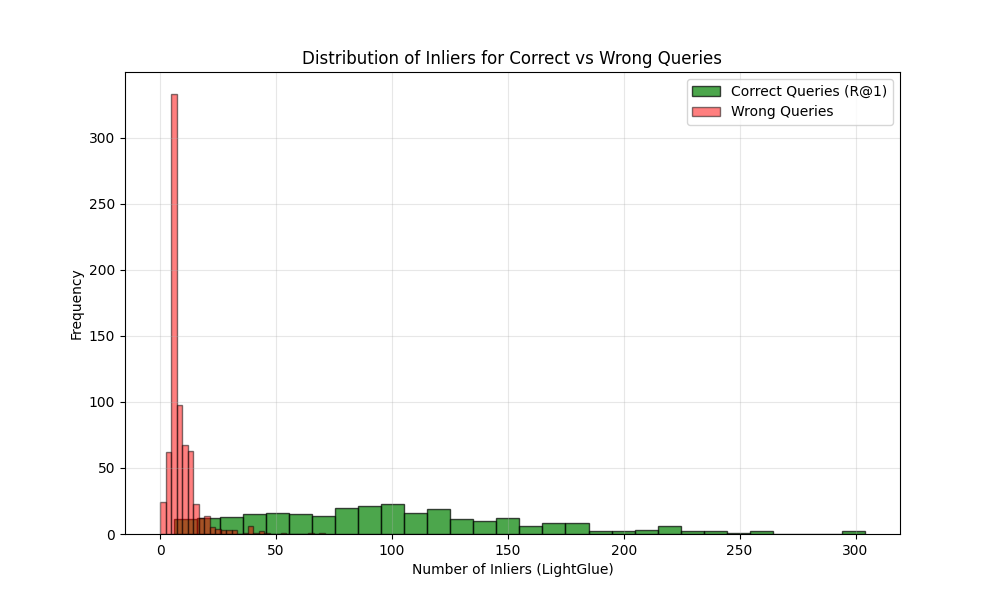

In [ ]:
import os
import subprocess
import matplotlib.pyplot as plt
from IPython.display import Image, display

# 1. POSIZIONAMENTO E AGGIORNAMENTO
if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")

print("🔄 Scarico 'plot_results.py' da GitHub...")
# Assumiamo che il tuo branch sia 'Marco', se è main cambia in 'main'
try:
    subprocess.run(["git", "pull", "origin", "Marco"], check=True)
except:
    print("⚠️ Git pull ha dato errore (forse sei già aggiornato), procedo comunque.")

# 2. CONFIGURAZIONE PERCORSI
dataset_name = "sf_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"
# Fallback path
if not os.path.exists(preds_dir):
    preds_dir = f"VPR-methods-evaluation/logs/netvlad_{dataset_name}/predictions_txt"

# Cerchiamo la cartella degli inliers (SuperPoint+LightGlue)
matcher_name = "superpoint-lg"
inliers_dir = f"{preds_dir}_{matcher_name}"

# Se non la trova col suffisso, cerca nella sottocartella "inliers"
if not os.path.exists(inliers_dir):
    possible_path = os.path.join(preds_dir, "inliers")
    if os.path.exists(possible_path):
        inliers_dir = possible_path

print(f"📂 Predizioni: {preds_dir}")
print(f"📂 Inliers: {inliers_dir}")

# 3. ESECUZIONE DEL PLOT
script_name = "plot_results.py" # Usiamo il nome che mi hai confermato
output_filename = "histogram_inliers_sfxs.png"

if os.path.exists(script_name) and os.path.exists(inliers_dir):
    print(f"\n🎨 --- GENERAZIONE GRAFICO con {script_name} ---")

    !python {script_name} \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --output-plot "$output_filename" \
        --threshold 25

    # 4. VISUALIZZAZIONE
    if os.path.exists(output_filename):
        print("\n✅ Grafico generato:")
        display(Image(output_filename))
    else:
        print("❌ Errore: Il grafico non è stato creato.")

elif not os.path.exists(script_name):
    print(f"❌ Errore: Non trovo '{script_name}' nella cartella corrente. Sicuro di aver fatto il push su GitHub?")
else:
    print("❌ Errore: Cartella inliers non trovata.")

### Esecuzione Matching LoFTR sf_xs

In [ ]:
import os
import subprocess

# 1. POSIZIONAMENTO
if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")

print("🔄 AGGIORNAMENTO CODICE E DIPENDENZE...")
# Pull per assicurarci di avere le ultime versioni di reranking.py e plot_results.py
subprocess.run(["git", "pull", "origin", "Marco"], check=True)

# SuperGlue potrebbe richiedere pesi esterni, installiamo wget per sicurezza
subprocess.run(["pip", "install", "py3_wget", "--quiet"], check=True)

print("✅ Pronto per SuperGlue.")

🔄 AGGIORNAMENTO CODICE E DIPENDENZE...
✅ Pronto per SuperGlue.


In [ ]:
import os
import sys

# 1. POSIZIONAMENTO
if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")

# 2. CONFIGURAZIONE AMBIENTE
target_folder = "image-matching-models"
cwd = os.getcwd()
# Puliamo il PYTHONPATH e impostiamo solo quello necessario per il submodule principale
os.environ["PYTHONPATH"] = f"{cwd}/{target_folder}:" + os.environ.get("PYTHONPATH", "")

# 3. AVVIO MATCHING LoFTR
dataset_name = "sf_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"
if not os.path.exists(preds_dir):
    preds_dir = f"VPR-methods-evaluation/logs/netvlad_{dataset_name}/predictions_txt"

if os.path.exists(preds_dir):
    print(f"\n🚀 AVVIO MATCHING LoFTR...")
    print(f"📂 Input: {preds_dir}")
    print("⏳ Nota: LoFTR non richiede SuperPoint. Monitora la barra di avanzamento.")

    # Utilizziamo il matcher 'loftr'
    !python match_queries_preds.py \
        --preds-dir "$preds_dir" \
        --matcher loftr \
        --device cuda \
        --im-size 512 \
        --num-preds 20
else:
    print("❌ Errore: Cartella predizioni non trovata.")


🚀 AVVIO MATCHING LoFTR...
📂 Input: logs/netvlad_sf_xs/predictions_txt
⏳ Nota: LoFTR non richiede SuperPoint. Monitora la barra di avanzamento.
100% 44.2M/44.2M [00:02<00:00, 16.6MB/s]
100% 1000/1000 [59:39<00:00,  3.58s/it]


####Reranking e Plot


In [ ]:
import os
import subprocess
from glob import glob

# 1. POSIZIONAMENTO E AGGIORNAMENTO
if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")

print("🔄 Scarico il codice aggiornato da GitHub...")
try:
    subprocess.run(["git", "pull", "origin", "Marco"], check=True)
except subprocess.CalledProcessError:
    print("⚠️ Git pull saltato o già aggiornato.")

# 2. CONFIGURAZIONE PERCORSI LoFTR
dataset_name = "sf_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"
if not os.path.exists(preds_dir):
    preds_dir = f"VPR-methods-evaluation/logs/netvlad_{dataset_name}/predictions_txt"

# Cerchiamo la cartella inliers specifica per LoFTR
matcher_name = "loftr"
inliers_dir = f"{preds_dir}_{matcher_name}"

# Fallback se la cartella è chiamata diversamente
if not os.path.exists(inliers_dir):
    possible_path = os.path.join(preds_dir, "inliers_loftr")
    if os.path.exists(possible_path):
        inliers_dir = possible_path

print(f"📂 Predizioni: {preds_dir}")
print(f"📂 Inliers rilevati: {inliers_dir}")

# 3. ESECUZIONE RERANKING
if os.path.exists(inliers_dir) and len(glob(f"{inliers_dir}/*.torch")) > 0:
    print(f"\n📊 --- CALCOLO RERANKING ({matcher_name.upper()}) ---")
    !python reranking.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --num-preds 20
else:
    print(f"\n❌ ERRORE: Non trovo i file .torch in {inliers_dir}.")
    print("Assicurati che match_queries_preds.py con --matcher loftr abbia finito.")

🔄 Scarico il codice aggiornato da GitHub...
📂 Predizioni: logs/netvlad_sf_xs/predictions_txt
📂 Inliers rilevati: logs/netvlad_sf_xs/predictions_txt_loftr

📊 --- CALCOLO RERANKING (LOFTR) ---
100% 1000/1000 [00:01<00:00, 523.67it/s]
R@1: 53.6, R@5: 55.3, R@10: 55.8, R@20: 56.2, R@100: 56.2



🎨 --- GENERAZIONE GRAFICO LoFTR ---
100% 1000/1000 [00:01<00:00, 801.79it/s]

📊 Plot saved to: histogram_loftr_sfxs.png
   Correct queries avg inliers: 192.9
   Wrong queries avg inliers:   18.2

✅ Grafico generato con successo:


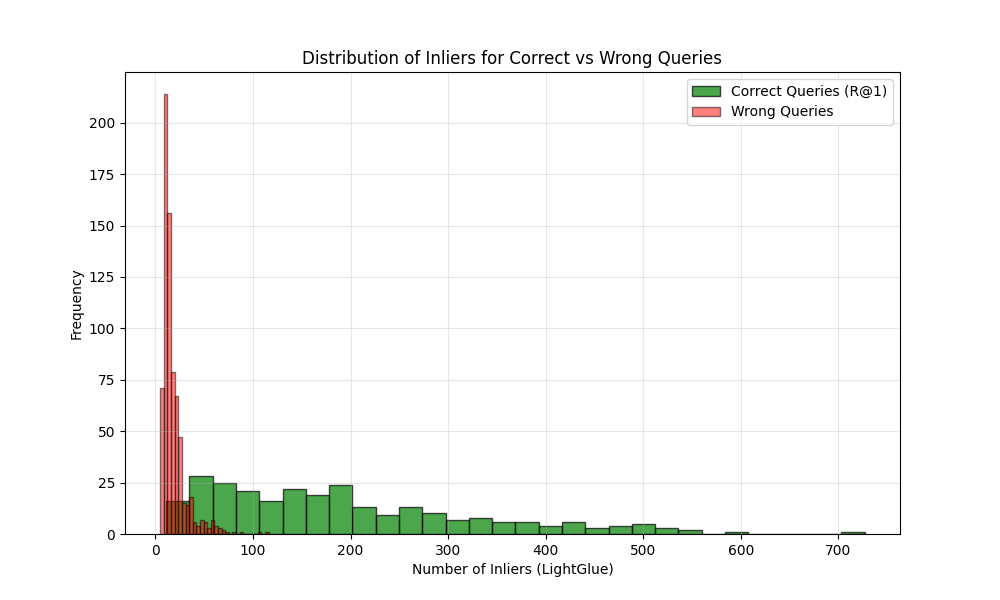

In [ ]:
import os
import subprocess
from IPython.display import Image, display

# 1. SETUP POSIZIONAMENTO
if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")

# 2. CONFIGURAZIONE PERCORSI
dataset_name = "sf_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"
if not os.path.exists(preds_dir):
    preds_dir = f"VPR-methods-evaluation/logs/netvlad_{dataset_name}/predictions_txt"

matcher_name = "loftr"
inliers_dir = f"{preds_dir}_{matcher_name}"
if not os.path.exists(inliers_dir):
    inliers_dir = os.path.join(preds_dir, "inliers_loftr")

# 3. ESECUZIONE DEL PLOT
script_name = "plot_results.py"
output_filename = "histogram_loftr_sfxs.png"

if os.path.exists(script_name) and os.path.exists(inliers_dir):
    print(f"\n🎨 --- GENERAZIONE GRAFICO LoFTR ---")

    !python {script_name} \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --output-plot "$output_filename" \
        --threshold 25

    # 4. VISUALIZZAZIONE
    if os.path.exists(output_filename):
        print("\n✅ Grafico generato con successo:")
        display(Image(output_filename))
    else:
        print("❌ Errore nella creazione del file immagine.")
else:
    print("❌ Script plot_results.py o cartella inliers non trovati.")

### Esecuzione Matching Superglue sf_xs

###Script Preliminare per installare dipendenze

In [ ]:
import os
import subprocess

# 1. POSIZIONAMENTO
if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")

print("🔄 AGGIORNAMENTO CODICE E DIPENDENZE...")
# Pull per assicurarci di avere le ultime versioni di reranking.py e plot_results.py
subprocess.run(["git", "pull", "origin", "Marco"], check=True)

# SuperGlue potrebbe richiedere pesi esterni, installiamo wget per sicurezza
subprocess.run(["pip", "install", "py3_wget", "--quiet"], check=True)

print("✅ Pronto per SuperGlue.")

🔄 AGGIORNAMENTO CODICE E DIPENDENZE...
✅ Pronto per SuperGlue.


In [ ]:
import os
%cd /content/Visual-Place-Recognition-Project

# Rimuovi la cartella se esiste ed è vuota/corrotta
!rm -rf image-matching-models

# Clone ricorsivo per scaricare tutti i sottomoduli (fondamentale per SuperGlue)
!git clone --recursive https://github.com/alexstoken/image-matching-models.git

/content
Cloning into 'image-matching-models'...
remote: Enumerating objects: 1573, done.
remote: Counting objects: 100% (680/680), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 1573 (delta 491), reused 466 (delta 457), pack-reused 893 (from 1)
Receiving objects: 100% (1573/1573), 88.49 MiB | 37.88 MiB/s, done.
Resolving deltas: 100% (1080/1080), done.
Submodule 'matching/third_party/DeDoDe' (https://github.com/Parskatt/DeDoDe) registered for path 'matching/third_party/DeDoDe'
Submodule 'matching/third_party/EDM' (https://github.com/chicleee/EDM) registered for path 'matching/third_party/EDM'
Submodule 'matching/third_party/EfficientLoFTR' (https://github.com/zju3dv/EfficientLoFTR) registered for path 'matching/third_party/EfficientLoFTR'
Submodule 'matching/third_party/LISRD' (https://github.com/rpautrat/LISRD.git) registered for path 'matching/third_party/LISRD'
Submodule 'matching/third_party/LiftFeat' (https://github.com/lyp-deeplearning/LiftFeat.git) regis

In [ ]:
import os

# 1. Spostati nella cartella (assicurati di aver fatto il clone --recursive prima)
%cd /content/Visual-Place-Recognition-Project/image-matching-models

# 2. Installazione rapida dei componenti necessari
print("📦 Installazione dipendenze SuperGlue...")
!pip install -e .
!pip install einops kornia kornia_moons yacs gdown py3_wget

# 3. Verifica sottomoduli
if os.path.exists("matching/third_party/imatch-toolbox/immatch"):
    print("✅ Sottomoduli pronti.")
else:
    print("❌ Errore: Sottomoduli mancanti. Esegui: !git submodule update --init --recursive")

/content/Visual-Place-Recognition-Project/image-matching-models
📦 Installazione dipendenze SuperGlue...
Obtaining file:///content/Visual-Place-Recognition-Project/image-matching-models
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for image-matching-models (pyproject.toml) ... done
  Created wheel for image-matching-models: filename=image_matching_models-1.0.0-0.editable-py3-none-any.whl size=18198 sha256=4f56920641934cbcd6fa7190e14df9e1a35400e60f41ae687788f395885cc08a
  Stored in directory: /tmp/pip-ephem-wheel-cache-y8niug7z/wheels/9a/cf/e0/7cc9a57859c70bbb607aeaee0682266ac433a9ecbbb62a448f
Successfully built image-matching-models
  Attempting uninstall: image-matching-models
    Found existing installation: image-matching-models 1.0.0
    Uninstalling image-matching-models-1.0.0:
      Successfully unins

In [ ]:
import os
import sys

# Torna alla root del progetto
%cd /content/Visual-Place-Recognition-Project

# --- CONFIGURAZIONE PATH (FIX PER UTILS.COMMON) ---
cwd = os.getcwd()
immatch_path = f"{cwd}/image-matching-models/matching/third_party/imatch-toolbox"
patch2pix_path = f"{immatch_path}/third_party/patch2pix"

# Iniettiamo i percorsi nel sistema
sys.path.insert(0, immatch_path)
sys.path.insert(0, patch2pix_path)
os.environ["PYTHONPATH"] = f"{immatch_path}:{patch2pix_path}:" + os.environ.get("PYTHONPATH", "")

# --- AVVIO MATCHING ---
dataset_name = "sf_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"
if not os.path.exists(preds_dir):
    preds_dir = f"VPR-methods-evaluation/logs/netvlad_{dataset_name}/predictions_txt"

if os.path.exists(preds_dir):
    print(f"🚀 AVVIO MATCHING SuperGlue su {dataset_name.upper()}...")
    !python match_queries_preds.py \
        --preds-dir "$preds_dir" \
        --matcher superglue \
        --device cuda \
        --im-size 512 \
        --num-preds 20
else:
    print(f"❌ Errore: Non trovo le predizioni NetVLAD in {preds_dir}")

/content/Visual-Place-Recognition-Project
🚀 AVVIO MATCHING SuperGlue su SF_XS...
/content/Visual-Place-Recognition-Project/image-matching-models/matching/third_party/imatch-toolbox/third_party/patch2pix/networks/ncn/model.py:233: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
  if checkpoint is not None and checkpoint is not '':
/content/Visual-Place-Recognition-Project/image-matching-models/matching/third_party/imatch-toolbox/third_party/patch2pix/networks/ncn/model.py:264: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
  if checkpoint is not None and checkpoint is not '':
Loaded SuperGlue model ("outdoor" weights)
Loaded SuperPoint model
Initialize SuperPoint_r4
Initialize SuperGlue_r4
100% 1000/1000 [23:16<00:00,  1.40s/it]


####Reranking e Plot


In [ ]:
import os
import subprocess
from glob import glob

# 1. POSIZIONAMENTO
if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")

# 2. CONFIGURAZIONE PERCORSI SUPERGLUE
dataset_name = "sf_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"
if not os.path.exists(preds_dir):
    preds_dir = f"VPR-methods-evaluation/logs/netvlad_{dataset_name}/predictions_txt"

# La cartella creata da SuperGlue
inliers_dir = f"{preds_dir}_superglue"

print(f"📂 Predizioni: {preds_dir}")
print(f"📂 Inliers rilevati: {inliers_dir}")

# 3. ESECUZIONE RERANKING
if os.path.exists(inliers_dir) and len(glob(f"{inliers_dir}/*.torch")) > 0:
    print(f"\n📊 --- CALCOLO RERANKING (SUPERGLUE) ---")
    !python reranking.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --num-preds 20
else:
    print(f"\n❌ ERRORE: Non trovo i file .torch in {inliers_dir}.")
    print("Aspetta che il matching finisca al 100%.")

📂 Predizioni: logs/netvlad_sf_xs/predictions_txt
📂 Inliers rilevati: logs/netvlad_sf_xs/predictions_txt_superglue

📊 --- CALCOLO RERANKING (SUPERGLUE) ---
100% 1000/1000 [00:02<00:00, 404.94it/s]
R@1: 52.4, R@5: 55.3, R@10: 55.8, R@20: 56.2, R@100: 56.2



🎨 --- GENERAZIONE GRAFICO SUPERGLUE ---
100% 1000/1000 [00:01<00:00, 661.63it/s]

📊 Plot saved to: histogram_superglue_sfxs.png
   Correct queries avg inliers: 24.6
   Wrong queries avg inliers:   5.9

✅ Grafico generato:


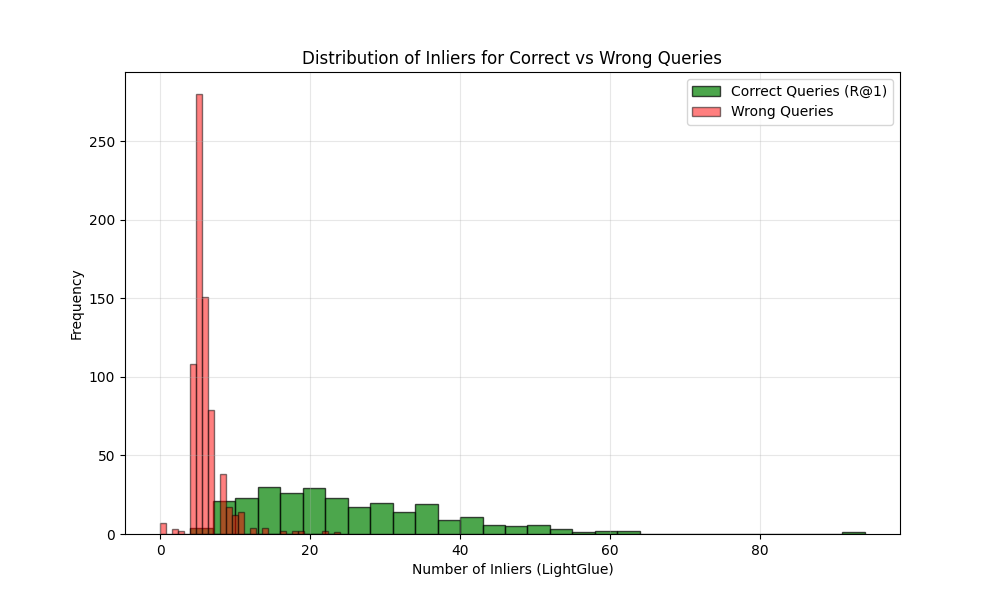

In [ ]:
import os
from IPython.display import Image, display

# 1. SETUP POSIZIONAMENTO
if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")

# 2. CONFIGURAZIONE PERCORSI
dataset_name = "sf_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"
if not os.path.exists(preds_dir):
    preds_dir = f"VPR-methods-evaluation/logs/netvlad_{dataset_name}/predictions_txt"

inliers_dir = f"{preds_dir}_superglue"

# 3. ESECUZIONE DEL PLOT
script_name = "plot_results.py"
output_filename = "histogram_superglue_sfxs.png"

if os.path.exists(script_name) and os.path.exists(inliers_dir):
    print(f"\n🎨 --- GENERAZIONE GRAFICO SUPERGLUE ---")

    !python {script_name} \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --output-plot "$output_filename" \
        --threshold 25

    # 4. VISUALIZZAZIONE
    if os.path.exists(output_filename):
        print("\n✅ Grafico generato:")
        display(Image(output_filename))
else:
    print("❌ Errore: Script o cartella inliers non trovati.")

## tokyo_xs

### Esecuzione Matching (SuperPoint + LightGlue) tokyo_xs
In questa fase confrontiamo le immagini query con i candidati proposti da NetVLAD per trovare le corrispondenze geometriche (inliers).

In [ ]:
import os
import sys
import shutil
import glob
import numpy as np
from pathlib import Path
from google.colab import drive

# 1. Collegamento Drive
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive', force_remount=True)

# --- CONFIGURAZIONE TOKYO ---
dataset_name = "tokyo_xs"
txt_output_dir = f"logs/netvlad_{dataset_name}/predictions_txt"
os.makedirs(txt_output_dir, exist_ok=True)

# FASE 1: Gestione Immagini Tokyo
db_folder = f"/content/data/{dataset_name}/test/database"
q_folder = f"/content/data/{dataset_name}/test/queries"

if not os.path.exists(db_folder):
    print(f"⚠️ Cerco {dataset_name}.zip nel Drive...")
    zip_path = next(Path("/content/drive/MyDrive").rglob(f"{dataset_name}.zip"), None)

    if zip_path:
        print(f"📦 Estraggo: {zip_path}")
        shutil.unpack_archive(zip_path, "/content/data")
        print("✅ Estrazione completata!")
    else:
        print(f"❌ ERRORE: Non trovo '{dataset_name}.zip'!")
        sys.exit()

# FASE 2: Caricamento Predizioni NetVLAD per Tokyo
print(f"🔍 Cerco 'preds.npy' per Tokyo...")
# Cerca un file npy che contenga 'tokyo' nel nome
found_npy = next((p for p in Path("/content/drive/MyDrive").rglob("preds.npy") if "tokyo" in str(p).lower()), None)

if found_npy:
    print(f"✅ TROVATO: {found_npy}")
    preds = np.load(found_npy)
else:
    print("❌ ERRORE: Non trovo 'preds.npy' per Tokyo.")
    sys.exit()

# FASE 3: Generazione file .txt
db_paths = sorted(glob.glob(os.path.join(db_folder, "*.jpg")) + glob.glob(os.path.join(db_folder, "*.png")))
q_paths = sorted(glob.glob(os.path.join(q_folder, "*.jpg")) + glob.glob(os.path.join(q_folder, "*.png")))

for i, row in enumerate(preds):
    if i >= len(q_paths): break
    out_file = os.path.join(txt_output_dir, f"{i}.txt")
    with open(out_file, "w") as f:
        f.write(f"Query: {os.path.basename(q_paths[i])}\n{q_paths[i]}\nPredictions:\n")
        for db_idx in row:
            if db_idx < len(db_paths):
                f.write(f"{db_paths[int(db_idx)]}\n")

print(f"🎉 FILE TXT GENERATI IN: {txt_output_dir}")

🔍 Cerco 'preds.npy' per Tokyo...
✅ TROVATO: /content/drive/MyDrive/VPR_Risultati_Finali/netvlad_tokyo/2025-12-20_09-45-54/preds/preds.npy
🎉 FILE TXT GENERATI IN: logs/netvlad_tokyo_xs/predictions_txt


In [ ]:
import os
import shutil
import subprocess

%cd /content/Visual-Place-Recognition-Project

# Pull aggiornamenti
subprocess.run(["git", "pull", "origin", "Marco"], check=True)

# Installazione LightGlue e dipendenze
!pip install git+https://github.com/cvg/LightGlue.git yacs einops kornia opencv-python --quiet

# Fix per image-matching-models
target_folder = "image-matching-models"
if os.path.exists(target_folder):
    shutil.rmtree(target_folder, ignore_errors=True)

print("📥 Scarico il sottomodulo image-matching-models...")
!git clone https://github.com/gmberton/image-matching-models {target_folder}

/content/Visual-Place-Recognition-Project
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
📥 Scarico il sottomodulo image-matching-models...
Cloning into 'image-matching-models'...
remote: Enumerating objects: 1573, done.
remote: Counting objects: 100% (680/680), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 1573 (delta 491), reused 466 (delta 457), pack-reused 893 (from 1)
Receiving objects: 100% (1573/1573), 88.49 MiB | 36.07 MiB/s, done.
Resolving deltas: 100% (1080/1080), done.


In [ ]:
import os
import sys

%cd /content/Visual-Place-Recognition-Project

# Configurazione PYTHONPATH
target_folder = "image-matching-models"
cwd = os.getcwd()
os.environ["PYTHONPATH"] = f"{cwd}/{target_folder}:" + os.environ.get("PYTHONPATH", "")

# Avvio Matching
dataset_name = "tokyo_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"

print(f"🚀 AVVIO MATCHING (SuperPoint + LightGlue) su {dataset_name.upper()}...")
!python match_queries_preds.py \
    --preds-dir "$preds_dir" \
    --matcher superpoint-lg \
    --device cuda \
    --im-size 512 \
    --num-preds 20

/content/Visual-Place-Recognition-Project
🚀 AVVIO MATCHING (SuperPoint + LightGlue) su TOKYO_XS...
100% 315/315 [18:35<00:00,  3.54s/it]


####Reranking e Plot


In [ ]:
import os
import subprocess
from glob import glob

# 1. POSIZIONAMENTO
if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")

# --- CONFIGURAZIONE TOKYO_XS ---
dataset_name = "tokyo_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"

# Tentativo di trovare la cartella inliers corretta
matcher_name = "superpoint-lg"
inliers_dir = f"{preds_dir}_{matcher_name}"

print(f"📂 Predizioni NetVLAD: {preds_dir}")
print(f"📂 Inliers rilevati: {inliers_dir}")

# 2. ESECUZIONE RERANKING
if os.path.exists(inliers_dir) and len(glob(f"{inliers_dir}/*.torch")) > 0:
    print(f"\n📊 --- CALCOLO RERANKING ({matcher_name.upper()}) ---")
    !python reranking.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --num-preds 20
else:
    print(f"\n❌ ERRORE: Non trovo i file .torch in {inliers_dir}.")
    print("Controlla che il matching sia terminato correttamente al 100%.")

📂 Predizioni NetVLAD: logs/netvlad_tokyo_xs/predictions_txt
📂 Inliers rilevati: logs/netvlad_tokyo_xs/predictions_txt_superpoint-lg

📊 --- CALCOLO RERANKING (SUPERPOINT-LG) ---
100% 315/315 [00:01<00:00, 217.95it/s]
R@1: 68.3, R@5: 72.1, R@10: 73.7, R@20: 78.7, R@100: 78.7



🎨 --- GENERAZIONE GRAFICO TOKYO_XS ---
100% 315/315 [00:01<00:00, 239.07it/s]

📊 Plot saved to: histogram_lightglue_tokyo_xs.png
   Correct queries avg inliers: 79.5
   Wrong queries avg inliers:   7.0

✅ Grafico 'histogram_lightglue_tokyo_xs.png' generato:


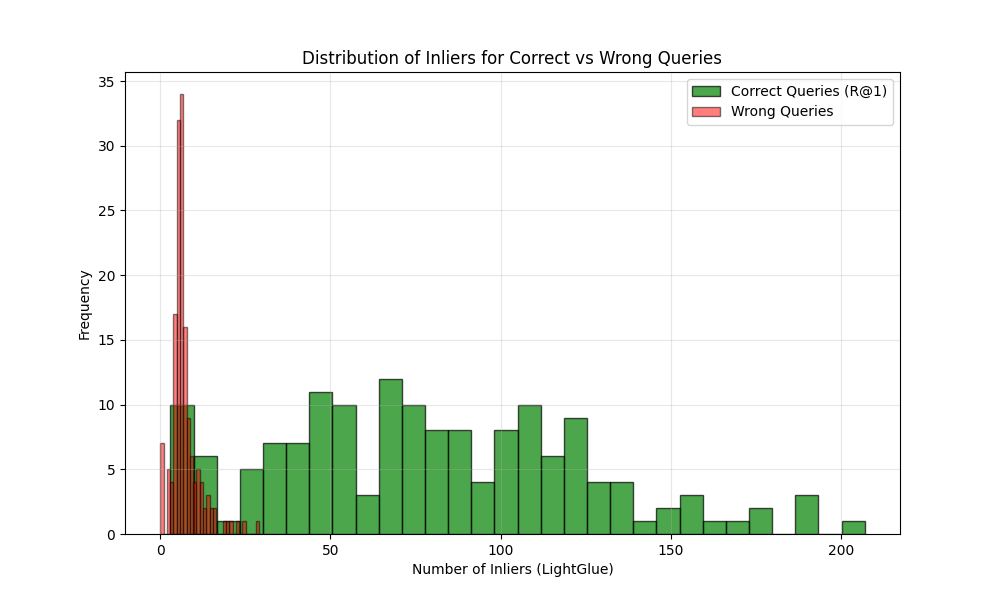

In [ ]:
import os
from IPython.display import Image, display

# 1. SETUP POSIZIONAMENTO
if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")

# --- CONFIGURAZIONE PERCORSI ---
dataset_name = "tokyo_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"
inliers_dir = f"{preds_dir}_superpoint-lg"

# Nome del file di output
output_filename = f"histogram_lightglue_{dataset_name}.png"

# 2. ESECUZIONE DEL PLOT
if os.path.exists(inliers_dir):
    print(f"\n🎨 --- GENERAZIONE GRAFICO TOKYO_XS ---")

    !python plot_results.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --output-plot "$output_filename" \
        --threshold 25

    # 3. VISUALIZZAZIONE
    if os.path.exists(output_filename):
        print(f"\n✅ Grafico '{output_filename}' generato:")
        display(Image(output_filename))
else:
    print(f"❌ Errore: Cartella inliers non trovata in {inliers_dir}")

### Esecuzione Matching (LoFTR) tokyo_xs

In [ ]:
import os
import sys

# 1. SETUP POSIZIONAMENTO
if os.path.exists("/content/Visual-Place-Recognition-Project"):
    os.chdir("/content/Visual-Place-Recognition-Project")

# 2. CONFIGURAZIONE AMBIENTE
target_folder = "image-matching-models"
cwd = os.getcwd()
os.environ["PYTHONPATH"] = f"{cwd}/{target_folder}:" + os.environ.get("PYTHONPATH", "")

# 3. AVVIO MATCHING
dataset_name = "tokyo_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"

if os.path.exists(preds_dir):
    print(f"🚀 AVVIO MATCHING LoFTR su {dataset_name.upper()}...")
    !python match_queries_preds.py \
        --preds-dir "$preds_dir" \
        --matcher loftr \
        --device cuda \
        --im-size 512 \
        --num-preds 20
else:
    print(f"❌ Errore: Cartella predizioni {preds_dir} non trovata.")

🚀 AVVIO MATCHING LoFTR su TOKYO_XS...
Downloading: "http://cmp.felk.cvut.cz/~mishkdmy/models/loftr_outdoor.ckpt" to /root/.cache/torch/hub/checkpoints/loftr_outdoor.ckpt
100% 44.2M/44.2M [00:02<00:00, 16.0MB/s]
100% 315/315 [19:41<00:00,  3.75s/it]


#### Reranking e Plot

In [ ]:
import os
from glob import glob

%cd /content/Visual-Place-Recognition-Project

dataset_name = "tokyo_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"
inliers_dir = f"{preds_dir}_loftr"

if os.path.exists(inliers_dir) and len(glob(f"{inliers_dir}/*.torch")) > 0:
    print(f"📊 --- RERANKING RISULTATI TOKYO_XS (LoFTR) ---")
    !python reranking.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --num-preds 20
else:
    print("❌ Risultati .torch non trovati in", inliers_dir)

/content
📊 --- RERANKING RISULTATI TOKYO_XS (LoFTR) ---
100% 315/315 [00:00<00:00, 516.78it/s]
R@1: 68.3, R@5: 72.7, R@10: 73.7, R@20: 78.7, R@100: 78.7


100% 315/315 [00:00<00:00, 780.25it/s]

📊 Plot saved to: histogram_loftr_tokyo_xs.png
   Correct queries avg inliers: 161.9
   Wrong queries avg inliers:   12.2


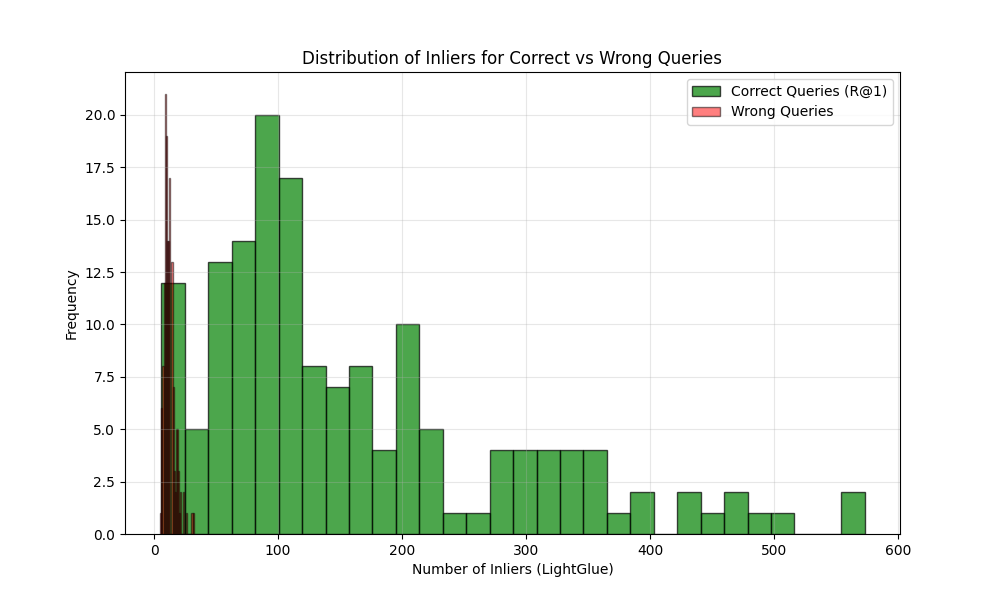

In [ ]:
import os
from IPython.display import Image, display

dataset_name = "tokyo_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"
inliers_dir = f"{preds_dir}_loftr"
output_plot = f"histogram_loftr_{dataset_name}.png"

if os.path.exists(inliers_dir):
    !python plot_results.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --output-plot "$output_plot" \
        --threshold 25

    display(Image(output_plot))
else:
    print("❌ Impossibile generare il plot: cartella inliers mancante.")

### Esecuzione Matching (SuperGlue) tokyo_xs

###Script preliminare per installare dipendenze

In [ ]:
import os
%cd /content/Visual-Place-Recognition-Project

# Pulizia e Clone Ricorsivo
!rm -rf image-matching-models
!git clone --recursive https://github.com/alexstoken/image-matching-models.git

# Installazione rapida delle dipendenze necessarie per SuperGlue
%cd image-matching-models
!pip install -e .
!pip install einops kornia kornia_moons yacs gdown py3_wget --quiet

/content
Cloning into 'image-matching-models'...
remote: Enumerating objects: 1573, done.
remote: Counting objects: 100% (679/679), done.
remote: Compressing objects: 100% (220/220), done.
remote: Total 1573 (delta 491), reused 467 (delta 458), pack-reused 894 (from 1)
Receiving objects: 100% (1573/1573), 88.49 MiB | 37.12 MiB/s, done.
Resolving deltas: 100% (1080/1080), done.
Submodule 'matching/third_party/DeDoDe' (https://github.com/Parskatt/DeDoDe) registered for path 'matching/third_party/DeDoDe'
Submodule 'matching/third_party/EDM' (https://github.com/chicleee/EDM) registered for path 'matching/third_party/EDM'
Submodule 'matching/third_party/EfficientLoFTR' (https://github.com/zju3dv/EfficientLoFTR) registered for path 'matching/third_party/EfficientLoFTR'
Submodule 'matching/third_party/LISRD' (https://github.com/rpautrat/LISRD.git) registered for path 'matching/third_party/LISRD'
Submodule 'matching/third_party/LiftFeat' (https://github.com/lyp-deeplearning/LiftFeat.git) regis

In [ ]:
import os
import sys

# Torna alla root del progetto
%cd /content/Visual-Place-Recognition-Project

# --- CONFIGURAZIONE PATH (FIX PER UTILS.COMMON) ---
cwd = os.getcwd()
immatch_path = f"{cwd}/image-matching-models/matching/third_party/imatch-toolbox"
patch2pix_path = f"{immatch_path}/third_party/patch2pix"

# Iniezione dei percorsi nel sistema
sys.path.insert(0, immatch_path)
sys.path.insert(0, patch2pix_path)
os.environ["PYTHONPATH"] = f"{immatch_path}:{patch2pix_path}:" + os.environ.get("PYTHONPATH", "")

# --- AVVIO MATCHING TOKYO_XS ---
dataset_name = "tokyo_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"

# Fallback se la cartella ha un percorso diverso
if not os.path.exists(preds_dir):
    preds_dir = f"VPR-methods-evaluation/logs/netvlad_{dataset_name}/predictions_txt"

if os.path.exists(preds_dir):
    print(f"🚀 AVVIO MATCHING SuperGlue su {dataset_name.upper()}...")
    !python match_queries_preds.py \
        --preds-dir "$preds_dir" \
        --matcher superglue \
        --device cuda \
        --im-size 512 \
        --num-preds 20
else:
    print(f"❌ Errore: Non trovo le predizioni NetVLAD per Tokyo in {preds_dir}")

/content/Visual-Place-Recognition-Project
🚀 AVVIO MATCHING SuperGlue su TOKYO_XS...
/content/Visual-Place-Recognition-Project/image-matching-models/matching/third_party/imatch-toolbox/third_party/patch2pix/networks/ncn/model.py:233: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
  if checkpoint is not None and checkpoint is not '':
/content/Visual-Place-Recognition-Project/image-matching-models/matching/third_party/imatch-toolbox/third_party/patch2pix/networks/ncn/model.py:264: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
  if checkpoint is not None and checkpoint is not '':
Loaded SuperGlue model ("outdoor" weights)
Loaded SuperPoint model
Initialize SuperPoint_r4
Initialize SuperGlue_r4
100% 315/315 [07:42<00:00,  1.47s/it]


#### Reranking e Plot

In [ ]:
%cd /content/Visual-Place-Recognition-Project
dataset_name = "tokyo_xs"
preds_dir = f"logs/netvlad_{dataset_name}/predictions_txt"
inliers_dir = f"{preds_dir}_superglue"

if os.path.exists(inliers_dir):
    print(f"📊 --- CALCOLO RERANKING TOKYO_XS (SUPERGLUE) ---")
    !python reranking.py --preds-dir "$preds_dir" --inliers-dir "$inliers_dir" --num-preds 20

/content/Visual-Place-Recognition-Project
📊 --- CALCOLO RERANKING TOKYO_XS (SUPERGLUE) ---
100% 315/315 [00:00<00:00, 407.75it/s]
R@1: 69.5, R@5: 72.7, R@10: 74.9, R@20: 78.7, R@100: 78.7


100% 315/315 [00:00<00:00, 614.28it/s]

📊 Plot saved to: histogram_superglue_tokyo_xs.png
   Correct queries avg inliers: 23.3
   Wrong queries avg inliers:   5.4


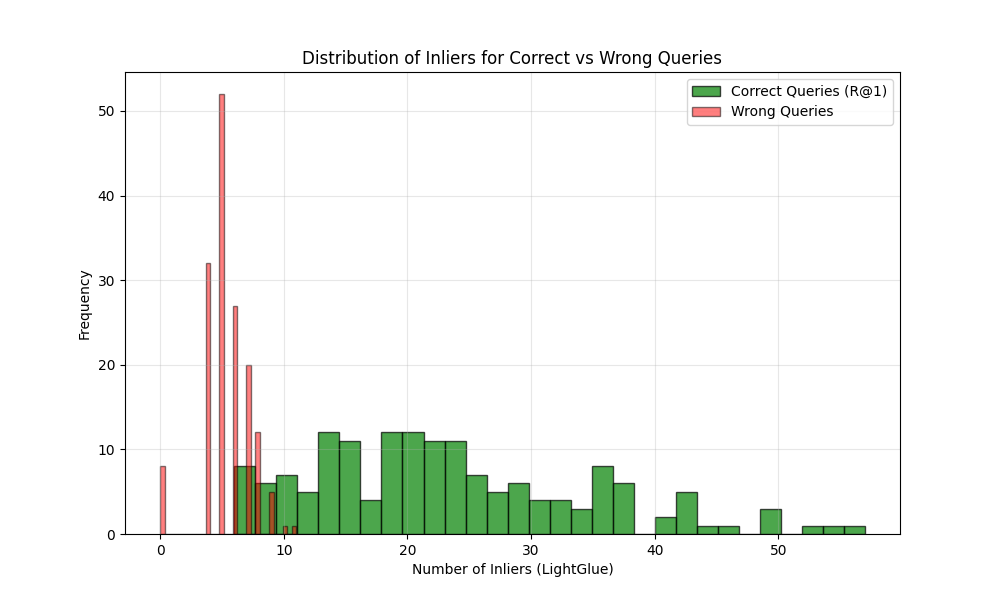

In [ ]:
from IPython.display import Image, display
output_plot = f"histogram_superglue_tokyo_xs.png"

!python plot_results.py \
    --preds-dir "$preds_dir" \
    --inliers-dir "$inliers_dir" \
    --output-plot "$output_plot" \
    --threshold 25

display(Image(output_plot))

##svox (sun e nigth)

###Estrazione txt

In [6]:
import os
import glob
import numpy as np
import shutil
from pathlib import Path

def generate_vpr_txt(condition):
    print(f"--- GENERAZIONE TXT PER {condition.upper()} ---")
    log_name = f"netvlad_svox_{condition}"
    drive_root = "/content/drive/MyDrive/VPR_Risultati_Finali"

    # Autodetect immagini
    possible_paths = list(Path("/content").rglob(f"queries_{condition}"))
    if not possible_paths:
        print(f"❌ ERRORE: Cartella queries_{condition} non trovata.")
        return

    base_extract = os.path.abspath(str(possible_paths[0].parent))
    q_folder = os.path.join(base_extract, f"queries_{condition}")
    db_folder = os.path.join(base_extract, "gallery")

    # Ricerca preds.npy su Drive
    found_files = sorted(glob.glob(os.path.join(drive_root, log_name, "*", "preds", "preds.npy")))
    if not found_files:
        print(f"❌ ERRORE: Nessun preds.npy trovato per {condition}")
        return

    npy_path = found_files[-1]
    preds = np.load(npy_path)

    # Cartella di output (Pulita)
    txt_output_dir = os.path.abspath(f"/content/Visual-Place-Recognition-Project/logs/{log_name}/predictions_txt")
    if os.path.exists(txt_output_dir): shutil.rmtree(txt_output_dir)
    os.makedirs(txt_output_dir, exist_ok=True)

    db_paths = sorted(glob.glob(os.path.join(db_folder, "*.jpg")) + glob.glob(os.path.join(db_folder, "*.png")))
    q_paths = sorted(glob.glob(os.path.join(q_folder, "*.jpg")) + glob.glob(os.path.join(q_folder, "*.png")))

    for i, row in enumerate(preds):
        if i >= len(q_paths): break
        out_file = os.path.join(txt_output_dir, f"{i}.txt")
        with open(out_file, "w") as f:
            f.write(f"Query: {os.path.basename(q_paths[i])}\n{os.path.abspath(q_paths[i])}\nPredictions:\n")
            for db_idx in row:
                if db_idx < len(db_paths):
                    f.write(f"{os.path.abspath(db_paths[int(db_idx)])}\n")

    print(f"✅ Creati {len(q_paths)} file TXT in: {txt_output_dir}\n")

# Eseguiamo per entrambi
generate_vpr_txt("sun")
generate_vpr_txt("night")

--- GENERAZIONE TXT PER SUN ---
✅ Creati 712 file TXT in: /content/Visual-Place-Recognition-Project/logs/netvlad_svox_sun/predictions_txt

--- GENERAZIONE TXT PER NIGHT ---
✅ Creati 702 file TXT in: /content/Visual-Place-Recognition-Project/logs/netvlad_svox_night/predictions_txt



### Esecuzione Matching (SuperPoint + LG) svox sun
In questa fase confrontiamo le immagini query con i candidati proposti da NetVLAD per trovare le corrispondenze geometriche (inliers).

In [ ]:
import os
%cd /content/Visual-Place-Recognition-Project

condition = "sun"
preds_dir = os.path.abspath(f"logs/netvlad_svox_{condition}/predictions_txt")
target_folder = "image-matching-models"

# Setup PYTHONPATH
os.environ["PYTHONPATH"] = f"{os.getcwd()}/{target_folder}:" + os.environ.get("PYTHONPATH", "")

print(f"🚀 AVVIO MATCHING -> SVOX {condition.upper()}")
!python match_queries_preds.py \
    --preds-dir "{preds_dir}" \
    --matcher superpoint-lg \
    --device cuda \
    --im-size 512 \
    --num-preds 20

/content
🚀 AVVIO MATCHING -> SVOX SUN
100% 712/712 [41:19<00:00,  3.48s/it]


#### Rerankig e result

In [ ]:
import os
%cd /content/Visual-Place-Recognition-Project

# --- CONFIGURAZIONE SUN ---
log_name = "netvlad_svox_sun"
preds_dir = f"logs/{log_name}/predictions_txt"
inliers_dir = f"{preds_dir}_superpoint-lg"

if os.path.exists(inliers_dir):
    print(f"📊 --- CALCOLO RERANKING: SVOX SUN ---")
    !python reranking.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --num-preds 20
else:
    print(f"❌ Inliers non trovati in {inliers_dir}. Verifica il matching.")

/content
📊 --- CALCOLO RERANKING: SVOX SUN ---
100% 712/712 [00:03<00:00, 216.45it/s]
R@1: 47.8, R@5: 49.6, R@10: 50.6, R@20: 51.4, R@100: 51.4


🎨 Generazione istogramma per SVOX SUN...
100% 712/712 [00:03<00:00, 200.67it/s]

📊 Plot saved to: histogram_svox_sun.png
   Correct queries avg inliers: 102.6
   Wrong queries avg inliers:   9.5


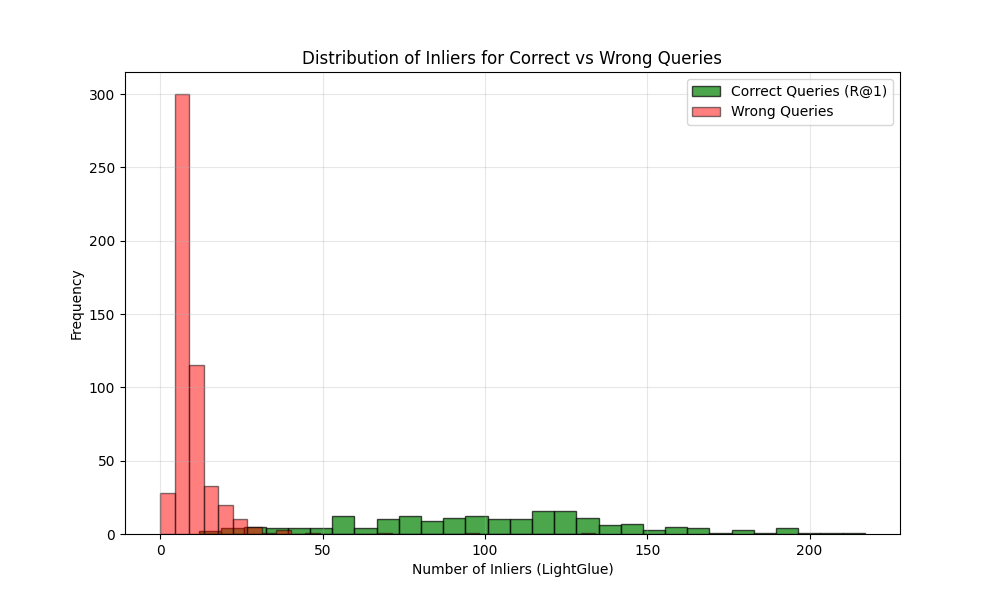

In [ ]:
import os
from IPython.display import Image, display

log_name = "netvlad_svox_sun"
preds_dir = f"logs/{log_name}/predictions_txt"
inliers_dir = f"{preds_dir}_superpoint-lg"
output_plot = "histogram_svox_sun.png"

if os.path.exists(inliers_dir):
    print(f"🎨 Generazione istogramma per SVOX SUN...")
    !python plot_results.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --output-plot "$output_plot" \
        --threshold 25
    display(Image(output_plot))

### Esecuzione Matching (SuperPoint + LG) svox nigth

In [ ]:
import os
%cd /content/Visual-Place-Recognition-Project

condition = "night"
preds_dir = os.path.abspath(f"logs/netvlad_svox_{condition}/predictions_txt")
target_folder = "image-matching-models"

# Setup PYTHONPATH
os.environ["PYTHONPATH"] = f"{os.getcwd()}/{target_folder}:" + os.environ.get("PYTHONPATH", "")

print(f"🚀 AVVIO MATCHING -> SVOX {condition.upper()}")
!python match_queries_preds.py \
    --preds-dir "{preds_dir}" \
    --matcher superpoint-lg \
    --device cuda \
    --im-size 512 \
    --num-preds 20

/content
🚀 AVVIO MATCHING -> SVOX NIGHT
100% 702/702 [40:43<00:00,  3.48s/it]


####Reranking e result

In [ ]:
import os
%cd /content/Visual-Place-Recognition-Project

# --- CONFIGURAZIONE NIGHT ---
log_name = "netvlad_svox_night"
preds_dir = f"logs/{log_name}/predictions_txt"
inliers_dir = f"{preds_dir}_superpoint-lg"

if os.path.exists(inliers_dir):
    print(f"📊 --- CALCOLO RERANKING: SVOX NIGHT ---")
    !python reranking.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --num-preds 20
else:
    print(f"❌ Inliers non trovati in {inliers_dir}. Verifica il matching.")

/content
📊 --- CALCOLO RERANKING: SVOX NIGHT ---
100% 702/702 [00:04<00:00, 171.21it/s]
R@1: 13.7, R@5: 15.5, R@10: 16.4, R@20: 17.8, R@100: 17.8


🎨 Generazione istogramma per SVOX NIGHT...
100% 702/702 [00:02<00:00, 243.16it/s]

📊 Plot saved to: histogram_svox_night.png
   Correct queries avg inliers: 58.4
   Wrong queries avg inliers:   6.9


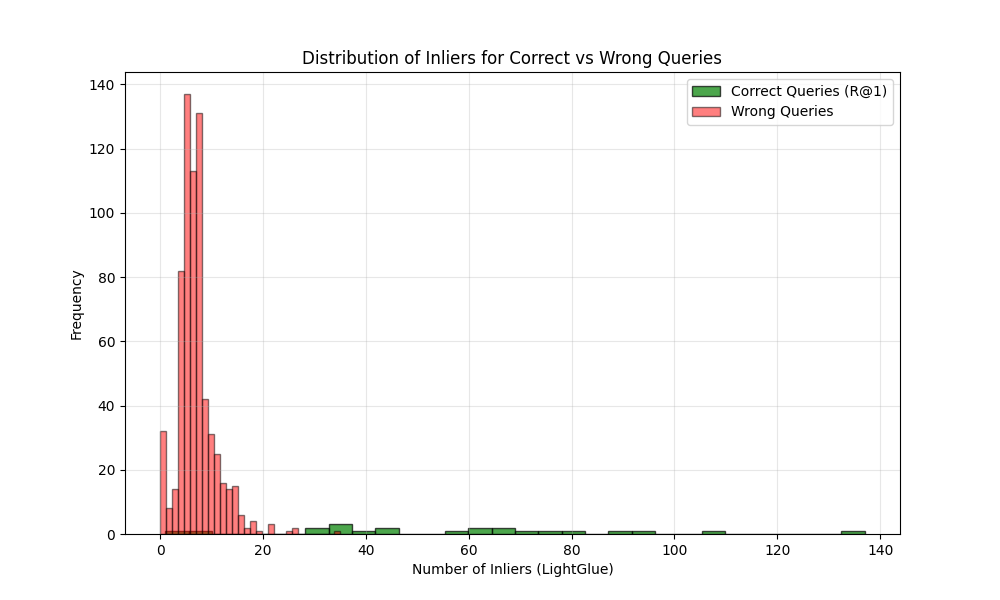

In [ ]:
import os
from IPython.display import Image, display

log_name = "netvlad_svox_night"
preds_dir = f"logs/{log_name}/predictions_txt"
inliers_dir = f"{preds_dir}_superpoint-lg"
output_plot = "histogram_svox_night.png"

if os.path.exists(inliers_dir):
    print(f"🎨 Generazione istogramma per SVOX NIGHT...")
    !python plot_results.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --output-plot "$output_plot" \
        --threshold 25
    display(Image(output_plot))

### Esecuzione Matching (LoFTR) svox sun

In [ ]:
import os
import sys
import glob
import numpy as np
from pathlib import Path

# 1. SETUP AMBIENTE
%cd /content/Visual-Place-Recognition-Project
target_folder = "image-matching-models"
os.environ["PYTHONPATH"] = f"{os.getcwd()}/{target_folder}:" + os.environ.get("PYTHONPATH", "")

# --- CONFIGURAZIONE SUN ---
condition = "sun"
log_name = f"netvlad_svox_{condition}"
# Percorso dei TXT generati in precedenza
preds_dir = os.path.abspath(f"logs/{log_name}/predictions_txt")

if not os.path.exists(preds_dir):
    print(f"❌ ERRORE: Cartella TXT non trovata. Riesegui lo script di generazione TXT.")
else:
    print(f"🚀 AVVIO MATCHING (LoFTR) -> SVOX {condition.upper()}")
    # Utilizziamo --matcher loftr
    !python match_queries_preds.py \
        --preds-dir "{preds_dir}" \
        --matcher loftr \
        --device cuda \
        --im-size 512 \
        --num-preds 20

/content
🚀 AVVIO MATCHING (LoFTR) -> SVOX SUN
Downloading: "http://cmp.felk.cvut.cz/~mishkdmy/models/loftr_outdoor.ckpt" to /root/.cache/torch/hub/checkpoints/loftr_outdoor.ckpt
100% 44.2M/44.2M [00:02<00:00, 16.7MB/s]
100% 712/712 [43:18<00:00,  3.65s/it]


#### Rerankig e result

In [ ]:
import os
%cd /content/Visual-Place-Recognition-Project

# --- CONFIGURAZIONE SUN ---
log_name = "netvlad_svox_sun"
preds_dir = f"logs/{log_name}/predictions_txt"
# Nota: LoFTR salva i risultati con il suffisso _loftr
inliers_dir = f"{preds_dir}_loftr"

if os.path.exists(inliers_dir):
    print(f"📊 --- CALCOLO RERANKING: SVOX SUN (LoFTR) ---")
    !python reranking.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --num-preds 20
else:
    print(f"❌ Inliers non trovati in {inliers_dir}. Verifica il matching LoFTR.")

/content
📊 --- CALCOLO RERANKING: SVOX SUN (LoFTR) ---
100% 712/712 [00:01<00:00, 554.35it/s]
R@1: 48.9, R@5: 50.1, R@10: 50.8, R@20: 51.4, R@100: 51.4


🎨 Generazione istogramma per SVOX SUN (LoFTR)...
100% 712/712 [00:00<00:00, 894.79it/s]

📊 Plot saved to: histogram_svox_sun_loftr.png
   Correct queries avg inliers: 176.0
   Wrong queries avg inliers:   11.4


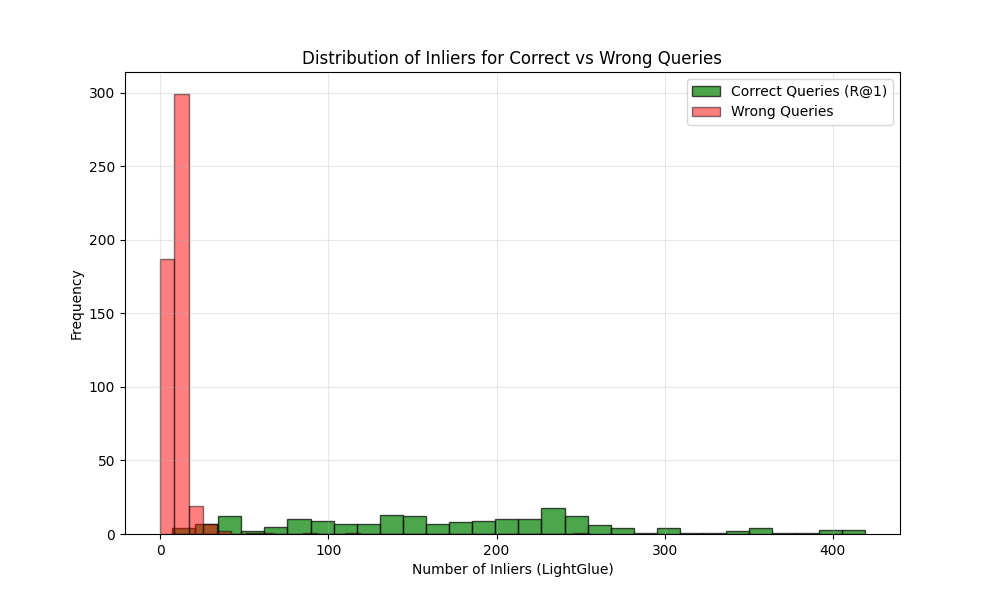

In [ ]:
import os
from IPython.display import Image, display

log_name = "netvlad_svox_sun"
preds_dir = f"logs/{log_name}/predictions_txt"
inliers_dir = f"{preds_dir}_loftr"
output_plot = "histogram_svox_sun_loftr.png"

if os.path.exists(inliers_dir):
    print(f"🎨 Generazione istogramma per SVOX SUN (LoFTR)...")
    # Usiamo plot_results.py come nei tuoi script precedenti
    !python plot_results.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --output-plot "$output_plot" \
        --threshold 25
    display(Image(output_plot))
else:
    print(f"❌ Impossibile generare il plot. Cartella inliers mancante: {inliers_dir}")

### Esecuzione Matching (LoFTR) svox night

In [ ]:
import os
import sys
import glob
import numpy as np
from pathlib import Path

# 1. SETUP AMBIENTE
%cd /content/Visual-Place-Recognition-Project
target_folder = "image-matching-models"
os.environ["PYTHONPATH"] = f"{os.getcwd()}/{target_folder}:" + os.environ.get("PYTHONPATH", "")

# --- CONFIGURAZIONE NIGHT ---
condition = "night"
log_name = f"netvlad_svox_{condition}"
# Percorso dei TXT generati in precedenza
preds_dir = os.path.abspath(f"logs/{log_name}/predictions_txt")

if not os.path.exists(preds_dir):
    print(f"❌ ERRORE: Cartella TXT non trovata.")
else:
    print(f"🚀 AVVIO MATCHING (LoFTR) -> SVOX {condition.upper()}")
    # Per la notte, LoFTR è spesso più efficace di SP+LG
    !python match_queries_preds.py \
        --preds-dir "{preds_dir}" \
        --matcher loftr \
        --device cuda \
        --im-size 512 \
        --num-preds 20

/content
🚀 AVVIO MATCHING (LoFTR) -> SVOX NIGHT
100% 702/702 [42:50<00:00,  3.66s/it]


####Reranking e result

In [ ]:
import os
%cd /content/Visual-Place-Recognition-Project

# --- CONFIGURAZIONE NIGHT ---
log_name = "netvlad_svox_night"
preds_dir = f"logs/{log_name}/predictions_txt"
# Percorso dove LoFTR ha salvato i file .torch
inliers_dir = f"{preds_dir}_loftr"

if os.path.exists(inliers_dir):
    print(f"📊 --- CALCOLO RERANKING: SVOX NIGHT (LoFTR) ---")
    !python reranking.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --num-preds 20
else:
    print(f"❌ Inliers non trovati in {inliers_dir}. Verifica se hai completato il matching LoFTR.")

/content
📊 --- CALCOLO RERANKING: SVOX NIGHT (LoFTR) ---
100% 702/702 [00:01<00:00, 473.48it/s]
R@1: 13.7, R@5: 15.2, R@10: 15.8, R@20: 17.8, R@100: 17.8


🎨 Generazione istogramma per SVOX NIGHT (LoFTR)...
100% 702/702 [00:00<00:00, 859.40it/s]

📊 Plot saved to: histogram_svox_night_loftr.png
   Correct queries avg inliers: 82.1
   Wrong queries avg inliers:   8.8


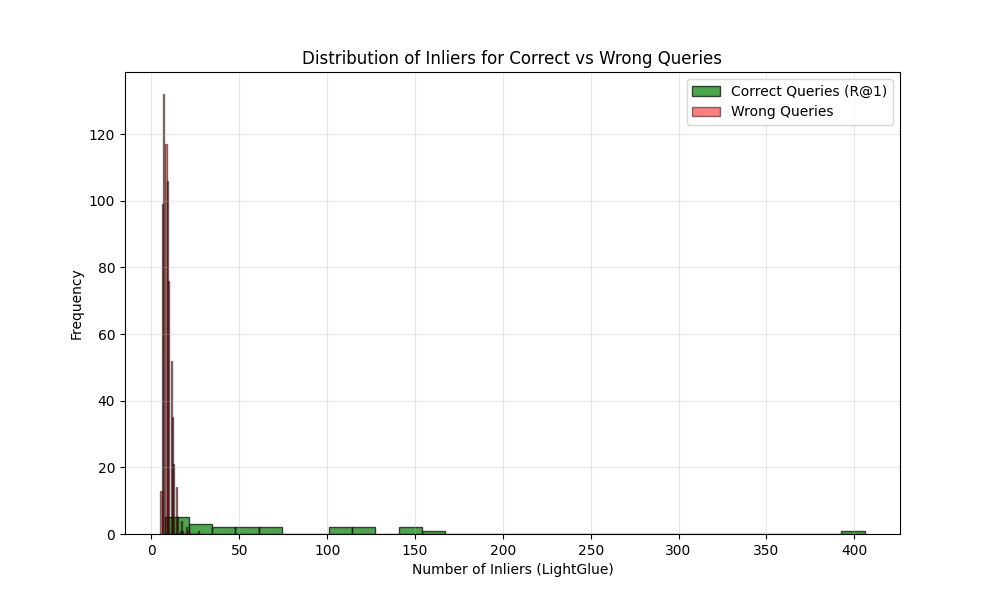

In [ ]:
import os
from IPython.display import Image, display

log_name = "netvlad_svox_night"
preds_dir = f"logs/{log_name}/predictions_txt"
inliers_dir = f"{preds_dir}_loftr"
output_plot = "histogram_svox_night_loftr.png"

if os.path.exists(inliers_dir):
    print(f"🎨 Generazione istogramma per SVOX NIGHT (LoFTR)...")
    !python plot_results.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --output-plot "$output_plot" \
        --threshold 25
    display(Image(output_plot))
else:
    print(f"❌ Impossibile generare il plot. Cartella inliers mancante: {inliers_dir}")

### Esecuzione Matching (Superglue) svox sun

###Script preliminare per installare dipendenze

In [7]:
import os
import sys
import shutil

# 1. POSIZIONAMENTO E INSTALLAZIONE
%cd /content/Visual-Place-Recognition-Project

print("🧹 Pulizia e Clone Ricorsivo di image-matching-models...")
if os.path.exists("image-matching-models"):
    shutil.rmtree("image-matching-models")

# Clone ricorsivo per scaricare anche SuperGlue e SuperPoint
!git clone --recursive https://github.com/alexstoken/image-matching-models.git

print("⚙️ Installazione dipendenze SuperGlue...")
%cd image-matching-models
!pip install -e . --quiet
!pip install einops kornia kornia_moons yacs gdown py3_wget --quiet

# 2. CONFIGURAZIONE PYTHONPATH (Cruciale per SuperGlue)
%cd /content/Visual-Place-Recognition-Project
cwd = os.getcwd()
immatch_path = f"{cwd}/image-matching-models/matching/third_party/imatch-toolbox"
patch2pix_path = f"{immatch_path}/third_party/patch2pix"

sys.path.insert(0, immatch_path)
sys.path.insert(0, patch2pix_path)
os.environ["PYTHONPATH"] = f"{immatch_path}:{patch2pix_path}:" + os.environ.get("PYTHONPATH", "")

/content
🧹 Pulizia e Clone Ricorsivo di image-matching-models...
Cloning into 'image-matching-models'...
remote: Enumerating objects: 1573, done.
remote: Counting objects: 100% (679/679), done.
remote: Compressing objects: 100% (220/220), done.
remote: Total 1573 (delta 491), reused 467 (delta 458), pack-reused 894 (from 1)
Receiving objects: 100% (1573/1573), 88.49 MiB | 26.22 MiB/s, done.
Resolving deltas: 100% (1080/1080), done.
Submodule 'matching/third_party/DeDoDe' (https://github.com/Parskatt/DeDoDe) registered for path 'matching/third_party/DeDoDe'
Submodule 'matching/third_party/EDM' (https://github.com/chicleee/EDM) registered for path 'matching/third_party/EDM'
Submodule 'matching/third_party/EfficientLoFTR' (https://github.com/zju3dv/EfficientLoFTR) registered for path 'matching/third_party/EfficientLoFTR'
Submodule 'matching/third_party/LISRD' (https://github.com/rpautrat/LISRD.git) registered for path 'matching/third_party/LISRD'
Submodule 'matching/third_party/LiftFeat' 

In [8]:
import os
import sys

# 1. POSIZIONAMENTO NELLA ROOT DEL PROGETTO
%cd /content/Visual-Place-Recognition-Project

# 2. CONFIGURAZIONE PYTHONPATH (Essenziale per SuperGlue)
# Questi percorsi permettono a Python di trovare i moduli SuperPoint e SuperGlue
cwd = os.getcwd()
immatch_path = f"{cwd}/image-matching-models/matching/third_party/imatch-toolbox"
patch2pix_path = f"{immatch_path}/third_party/patch2pix"

# Iniezione manuale nei percorsi di sistema
sys.path.insert(0, immatch_path)
sys.path.insert(0, patch2pix_path)

# Impostazione della variabile d'ambiente per i processi figli (!python)
os.environ["PYTHONPATH"] = f"{immatch_path}:{patch2pix_path}:" + os.environ.get("PYTHONPATH", "")

# 3. CONFIGURAZIONE DATASET
condition = "sun"
log_name = f"netvlad_svox_{condition}"
preds_dir = f"logs/{log_name}/predictions_txt"

# Verifica esistenza cartella input
if not os.path.exists(preds_dir):
    print(f"❌ Errore: Non trovo i file TXT in {preds_dir}. Assicurati di averli generati.")
else:
    print(f"🔥 AVVIO MATCHING SuperGlue -> SVOX {condition.upper()}")
    print(f"📂 Predizioni: {preds_dir}")

    # Esecuzione del matching
    !python match_queries_preds.py \
        --preds-dir "{preds_dir}" \
        --matcher superglue \
        --device cuda \
        --im-size 512 \
        --num-preds 20

/content/Visual-Place-Recognition-Project
🔥 AVVIO MATCHING SuperGlue -> SVOX SUN
📂 Predizioni: logs/netvlad_svox_sun/predictions_txt
/content/Visual-Place-Recognition-Project/image-matching-models/matching/third_party/imatch-toolbox/third_party/patch2pix/networks/ncn/model.py:233: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
  if checkpoint is not None and checkpoint is not '':
/content/Visual-Place-Recognition-Project/image-matching-models/matching/third_party/imatch-toolbox/third_party/patch2pix/networks/ncn/model.py:264: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
  if checkpoint is not None and checkpoint is not '':
Loaded SuperGlue model ("outdoor" weights)
Loaded SuperPoint model
Initialize SuperPoint_r4
Initialize SuperGlue_r4
100% 712/712 [17:52<00:00,  1.51s/it]


####Reranking e result

In [9]:
import os
%cd /content/Visual-Place-Recognition-Project

# --- CONFIGURAZIONE SUN ---
log_name = "netvlad_svox_sun"
preds_dir = f"logs/{log_name}/predictions_txt"
# SuperGlue salva i risultati con il suffisso _superglue
inliers_dir = f"{preds_dir}_superglue"

if os.path.exists(inliers_dir):
    print(f"📊 --- CALCOLO RERANKING: SVOX SUN (SuperGlue) ---")
    !python reranking.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --num-preds 20
else:
    print(f"❌ Inliers non trovati in {inliers_dir}. Verifica se il matching è terminato.")

/content/Visual-Place-Recognition-Project
📊 --- CALCOLO RERANKING: SVOX SUN (SuperGlue) ---
100% 712/712 [00:02<00:00, 330.18it/s]
R@1: 46.8, R@5: 49.7, R@10: 50.7, R@20: 51.4, R@100: 51.4


🎨 Generazione istogramma per SVOX SUN (SuperGlue)...
100% 712/712 [00:01<00:00, 551.56it/s]

📊 Plot saved to: histogram_svox_sun_superglue.png
   Correct queries avg inliers: 42.6
   Wrong queries avg inliers:   7.0


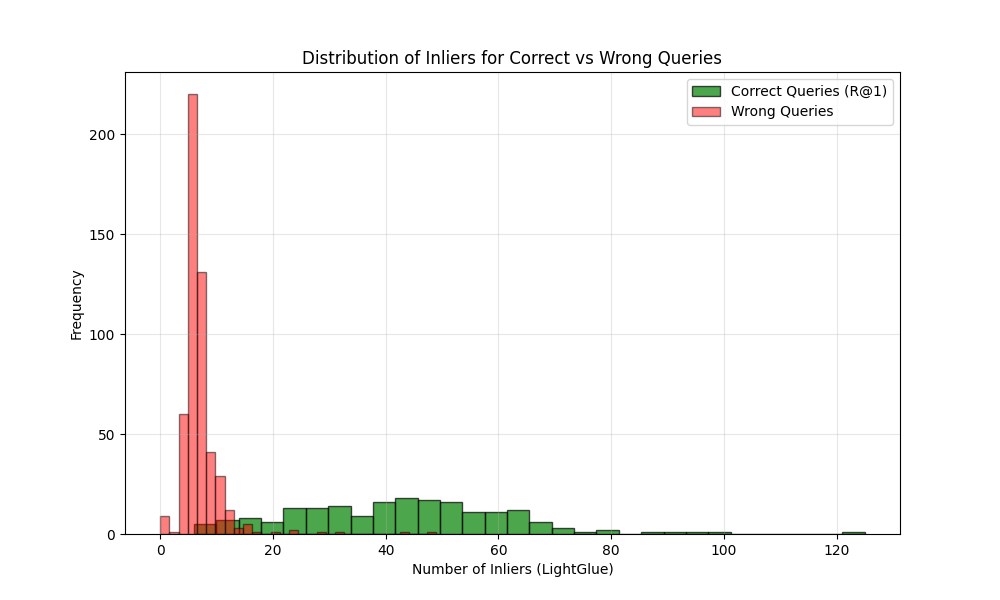

In [10]:
import os
from IPython.display import Image, display

log_name = "netvlad_svox_sun"
preds_dir = f"logs/{log_name}/predictions_txt"
inliers_dir = f"{preds_dir}_superglue"
output_plot = "histogram_svox_sun_superglue.png"

if os.path.exists(inliers_dir):
    print(f"🎨 Generazione istogramma per SVOX SUN (SuperGlue)...")
    !python plot_results.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --output-plot "$output_plot" \
        --threshold 25
    display(Image(output_plot))
else:
    print(f"❌ Impossibile generare il plot. Cartella inliers mancante: {inliers_dir}")

### Esecuzione Matching (Superglue) svox sun

In [11]:
import os
import sys

# 1. POSIZIONAMENTO E SETUP PERCORSI
%cd /content/Visual-Place-Recognition-Project
cwd = os.getcwd()
immatch_path = f"{cwd}/image-matching-models/matching/third_party/imatch-toolbox"
patch2pix_path = f"{immatch_path}/third_party/patch2pix"

# Iniezione percorsi nel sistema
sys.path.insert(0, immatch_path)
sys.path.insert(0, patch2pix_path)
os.environ["PYTHONPATH"] = f"{immatch_path}:{patch2pix_path}:" + os.environ.get("PYTHONPATH", "")

# 2. CONFIGURAZIONE DATASET NIGHT
condition = "night"
log_name = f"netvlad_svox_{condition}"
preds_dir = f"logs/{log_name}/predictions_txt"

if os.path.exists(preds_dir):
    print(f"🔥 AVVIO MATCHING SuperGlue -> SVOX {condition.upper()}")
    !python match_queries_preds.py \
        --preds-dir "{preds_dir}" \
        --matcher superglue \
        --device cuda \
        --im-size 512 \
        --num-preds 20
else:
    print(f"❌ Errore: Cartella predizioni non trovata in {preds_dir}")

/content/Visual-Place-Recognition-Project
🔥 AVVIO MATCHING SuperGlue -> SVOX NIGHT
Loaded SuperGlue model ("outdoor" weights)
Loaded SuperPoint model
Initialize SuperPoint_r4
Initialize SuperGlue_r4
100% 702/702 [17:15<00:00,  1.47s/it]


####Reranking e result

In [12]:
import os
%cd /content/Visual-Place-Recognition-Project

# --- CONFIGURAZIONE NIGHT ---
log_name = "netvlad_svox_night"
preds_dir = f"logs/{log_name}/predictions_txt"
inliers_dir = f"{preds_dir}_superglue"

if os.path.exists(inliers_dir):
    print(f"📊 --- CALCOLO RERANKING: SVOX NIGHT (SuperGlue) ---")
    !python reranking.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --num-preds 20
else:
    print(f"❌ Inliers non trovati in {inliers_dir}. Verifica se il matching è terminato.")

/content/Visual-Place-Recognition-Project
📊 --- CALCOLO RERANKING: SVOX NIGHT (SuperGlue) ---
100% 702/702 [00:02<00:00, 337.58it/s]
R@1: 13.2, R@5: 15.2, R@10: 16.5, R@20: 17.8, R@100: 17.8


🎨 Generazione istogramma per SVOX NIGHT (SuperGlue)...
100% 702/702 [00:01<00:00, 392.20it/s]

📊 Plot saved to: histogram_svox_night_superglue.png
   Correct queries avg inliers: 26.4
   Wrong queries avg inliers:   5.7


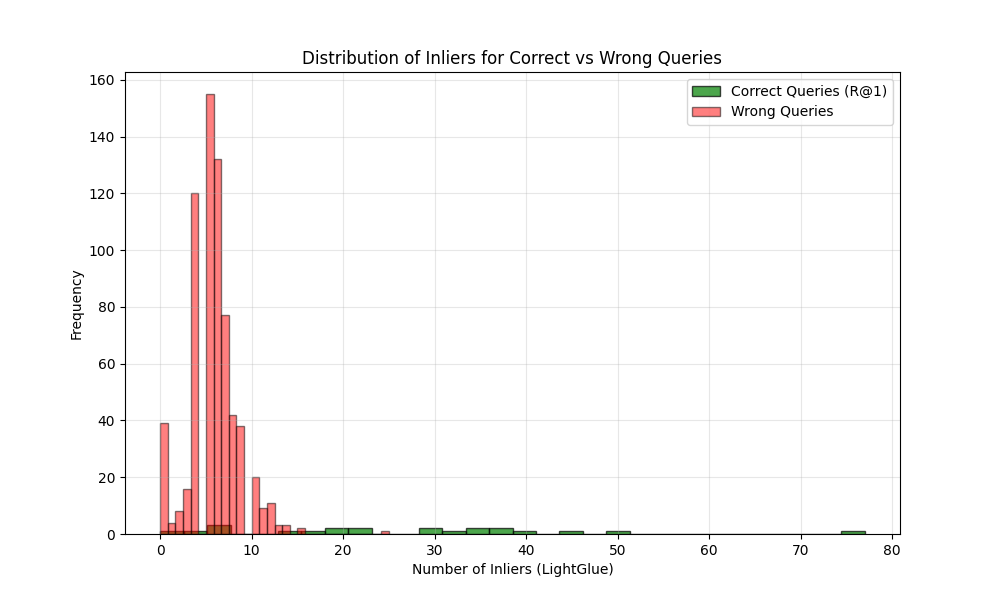

In [13]:
import os
from IPython.display import Image, display

log_name = "netvlad_svox_night"
preds_dir = f"logs/{log_name}/predictions_txt"
inliers_dir = f"{preds_dir}_superglue"
output_plot = "histogram_svox_night_superglue.png"

if os.path.exists(inliers_dir):
    print(f"🎨 Generazione istogramma per SVOX NIGHT (SuperGlue)...")
    !python plot_results.py \
        --preds-dir "$preds_dir" \
        --inliers-dir "$inliers_dir" \
        --output-plot "$output_plot" \
        --threshold 25
    display(Image(output_plot))
else:
    print(f"❌ Impossibile generare il plot. Cartella inliers mancante: {inliers_dir}")